## Avance 1


In [1]:
#Carga de las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
#Carga de los datos
data = pd.read_csv ("data_latinoamerica.csv", sep=",")

In [ ]:
#se imprimen los primeros datos para tener una primera imagen de la estructura de los mismos.
data.head ()

4) Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

In [ ]:
np.shape (data)

5) elecciona los países donde se expandirán:

In [ ]:
#creo una lista con los paises seleccionados:
Paises_seleccionados = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]
#se crea un amascara por paises y
data_latinoamerica = data[data["country_name"].isin(Paises_seleccionados)]



In [ ]:
#se vuelve a ver la cantidad de datos, para ver si funcionó la mascara
np.shape (data_latinoamerica)

como sigue siendo un dataset demasiado grande se prosigue a verificar la calidad de los datos y evaluar si es necesario limpiar o agregar algun otro filtro

In [ ]:
#se le agrega un filtro para ver solos los valores mayores a 4000000 para ver los nulos mas grandes y luego se vera a detale los nulos
data_latinoamerica.isnull().sum() [data_latinoamerica.isnull().sum()>4000000]

Considerando que un gran porcentaje de los datos son nulos se procede a hacer una limpieza mas profunda de los mismos

In [ ]:
#se filtra la columna location_key para ver sus datos
data_latinoamerica.location_key.value_counts()

In [ ]:
#En el paso anterior se ve que hay datos duplicados, por lo cual se procede a filtrar por la columna de codigo de pais y se imprimepara
data_latinoamerica_codigo = data_latinoamerica [data_latinoamerica["location_key"].isin(["AR","BR","CO","CL","MX","PE"])]

data_latinoamerica_codigo.shape

6) Filtra los datos en fechas mayores a 2021-01-01.

In [ ]:
#se aplica el filtro sobre la fecha dada

data_latinoamerica_codigo_fecha = data_latinoamerica_codigo [data_latinoamerica_codigo["date"] > "2021-01-01" ]

data_latinoamerica_codigo_fecha.shape

7) Compara a nivel de país para llenar valores faltantes.

In [ ]:
#se evalua si hay nulos ahora se le agrga un parametro mayor a 0 para ver todos los valores nulos
nulos_fecha = data_latinoamerica_codigo_fecha.isnull().sum()[data_latinoamerica_codigo_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(data_latinoamerica_codigo_fecha))

In [ ]:
nulos_fecha.index

8) Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [ ]:
#for pais in Paises_seleccionados:
 #  for j in data_latinoamerica_codigo_fecha:
  #      data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha["country_name"]==pais, j] = data_latinoamerica_codigo_fecha [j].fillna(data_latinoamerica_codigo_fecha.iloc[data_latinoamerica_codigo_fecha["country_name"]==pais,j].mean())

#for pais in Paises_seleccionados:
  #  for j in nulos_fecha:
        # Filtrando por país
   #     mask = data_latinoamerica_codigo_fecha["country_name"] == pais
        # Calculando la media de la columna 'j' para el país específico
   #     mean_value = data_latinoamerica_codigo_fecha.loc[mask, j].mean()
        # Rellenando los valores nulos en la columna 'j' para el país específico con la media calculada
   #     data_latinoamerica_codigo_fecha.loc[mask, j] = data_latinoamerica_codigo_fecha.loc[mask, j].fillna(mean_value)

for pais in Paises_seleccionados:
    for columna in data_latinoamerica_codigo_fecha:
        if columna != 'country_name':  # No queremos llenar valores nulos en la columna 'País'
            moda = data_latinoamerica_codigo_fecha[data_latinoamerica_codigo_fecha['country_name'] == pais][columna].mode().iloc[0] if not data_latinoamerica_codigo_fecha[data_latinoamerica_codigo_fecha['country_name'] == pais][columna].mode().empty else np.nan
            data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha['country_name'] == pais, columna] = data_latinoamerica_codigo_fecha.loc[data_latinoamerica_codigo_fecha['country_name'] == pais, columna].fillna(moda)

print(data_latinoamerica_codigo_fecha)

In [ ]:
#se imprime nuevamente los nulos para ver que se hayan completado los valores corectamente
nulos_fecha = data_latinoamerica_codigo_fecha.isnull().sum() [data_latinoamerica_codigo_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(data_latinoamerica_codigo_fecha))
#se logra ver que solo las ultimas dos columnas estan con nulos las cuales se pasará a analizar mas adelante

Se pasa a guardar el archivo en fomrato csv

In [ ]:
data_latinoamerica_codigo_fecha.to_csv ("datosfiltradosprimeraparte.csv",index=False)

Continuamos las siguientes consignas con el nuevo dataset (data_latinoamerica)

In [ ]:
data_latinoamerica = pd.read_csv ("datosfiltradosprimeraparte.csv",sep= ",")

In [ ]:
#Se ejecuta para ver los datos de las columnas agregadas a la variable

for i in data_latinoamerica.columns:
    print (i)
    print (data_latinoamerica[i].describe())
    print ("_________________________________________________") #se ejecuta este print para dividir cada columna y facilitar la legibilidad

In [ ]:
#Se cambia el tipo de dato de fecha
data_latinoamerica ["date"] = pd.to_datetime(data_latinoamerica["date"], format="%Y-%m-%d")

In [ ]:
#se imprime el tipo de datos para ver que se haya cambiado el formato
print (data_latinoamerica["date"].dtypes)

12) Crea una función que permita obtener la mediana, varianza y el rango.

In [ ]:
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad
calculos_primarios (data_latinoamerica)

Se logra ver que los nuevos confimrados el minimo es un numero negativo, y no puede haber numero negativo en la columna, ya que no tiene logica. Despues se ve en la moda de nuevas muertes que la mayor parte de los dias no hay decesos por covid, pero a su vez el maximo es demasiado alto ya que hay mas de 11000 muertes por dia (lo vi desde la ventana de variables y es demasiado alto y un suceso unico en colombia, ya que luego el maximo no llega a 5000 muertes diarias)


¿Qué representa la mediana?

Representa el valor del medio de los valores obtenidos

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?

No se identifican patrones debido a la gran variabilidad de los datos

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?



## Avance 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#Se abre el dataset que se va a utilizar
Data_latinoamerica_nuevo = pd.read_csv ("datosfiltradosprimeraparte.csv",sep= ",")

In [ ]:
#Se abre nuevamente la informacion
for i in Data_latinoamerica_nuevo:
    print (i)
    print (Data_latinoamerica_nuevo[i].describe())
    print ("______________________________________")



Unnamed: 0
count    3.744000e+03
mean     5.190546e+06
std      3.722908e+06
min      3.670000e+02
25%      5.506838e+05
50%      6.296006e+06
75%      7.746334e+06
max      1.025388e+07
Name: Unnamed: 0, dtype: float64
______________________________________
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
______________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
______________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
______________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
______________________________________
new_confirmed
count      3744.000000
mean      13863.400374
std       24225.379296
min        -573.000000
25%        1512.500000


In [ ]:
#Se crea una variable con los nombres de laos paises para tenerlos para los graficos
Nombre_Paises_Nuevo = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]

In [ ]:
# Cambio de nulos a 0 en las columnas 'cumulative_recovered' y 'new_recovered'
Data_latinoamerica_nuevo['cumulative_recovered'] = Data_latinoamerica_nuevo['cumulative_recovered'].fillna(0)
Data_latinoamerica_nuevo['new_recovered'] = Data_latinoamerica_nuevo['new_recovered'].fillna(0)

In [ ]:
Data_latinoamerica_nuevo ["date"] = pd.to_datetime (Data_latinoamerica_nuevo["date"])
Data_latinoamerica_nuevo.set_index("date")

Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   
2021-01-06         371           AR           AR    Argentina        14496.0   
...                ...          ...          ...          ...            ...   
2022-09-13    10253872           PE           PE         Peru         1150.0   
2022-09-14    10253873           PE           PE         Peru            0.0   
2022-09-15    10253874           PE           PE         Peru            0.0   
2022-09-16    10253875           PE           PE         Peru            0.0   
2022-09-17    10253876           PE           PE         Peru            0.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14          29.0             3569026.0             206891.0   
2022-09-15          29.0             3569026.0             206891.0   
2022-09-16          29.0             3569026.0             206891.0   
2022-09-17          29.0             3569026.0             206891.0   

            cumulative_vaccine_doses_administered  population  ...  \
date                                                           ...   
2021-01-02                                20334.0  44938712.0  ...   
2021-01-03                                20529.0  44938712.0  ...   
2021-01-04                                25164.0  44938712.0  ...   
2021-01-05                                29852.0  44938712.0  ...   
2021-01-06                                34162.0  44938712.0  ...   
...                                           ...         ...  ...   
2022-09-13                                 3762.0  29381884.0  ...   
2022-09-14                                 3762.0  29381884.0  ...   
2022-09-15                                 3762.0  29381884.0  ...   
2022-09-16                                 3762.0  29381884.0  ...   
2022-09-17                                 3762.0  29381884.0  ...   

            population_largest_city  area_rural_sq_km  area_urban_sq_km  \
date                                                                      
2021-01-02               15057273.0         2690269.0           55032.0   
2021-01-03               15057273.0         2690269.0           55032.0   
2021-01-04               15057273.0         2690269.0           55032.0   
2021-01-05               15057273.0         2690269.0           55032.0   
2021-01-06               15057273.0         2690269.0           55032.0   
...                             ...               ...               ...   
2022-09-13               10554712.0         1256339.0           16425.0   
2022-09-14               10554712.0         1256339.0           16425.0   
2022-09-15               10554712.0         1256339.0           16425.0   
2022-09-16               10554712.0         1256339.0           16425.0   
2022-09-17               10554712.0         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                 

In [ ]:
# Se crea la matriz de correlacion de las variables numericas
columnas_numericas = Data_latinoamerica_nuevo.select_dtypes(include= ["float64", "int64"]).columns
matriz_correlacion = Data_latinoamerica_nuevo[columnas_numericas].corr()

# Se crea la mascara para el triangulo superior
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Filtramos valores mayores a 0.5 para mostrar las correlaciones mas fuertes
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > 0.5]




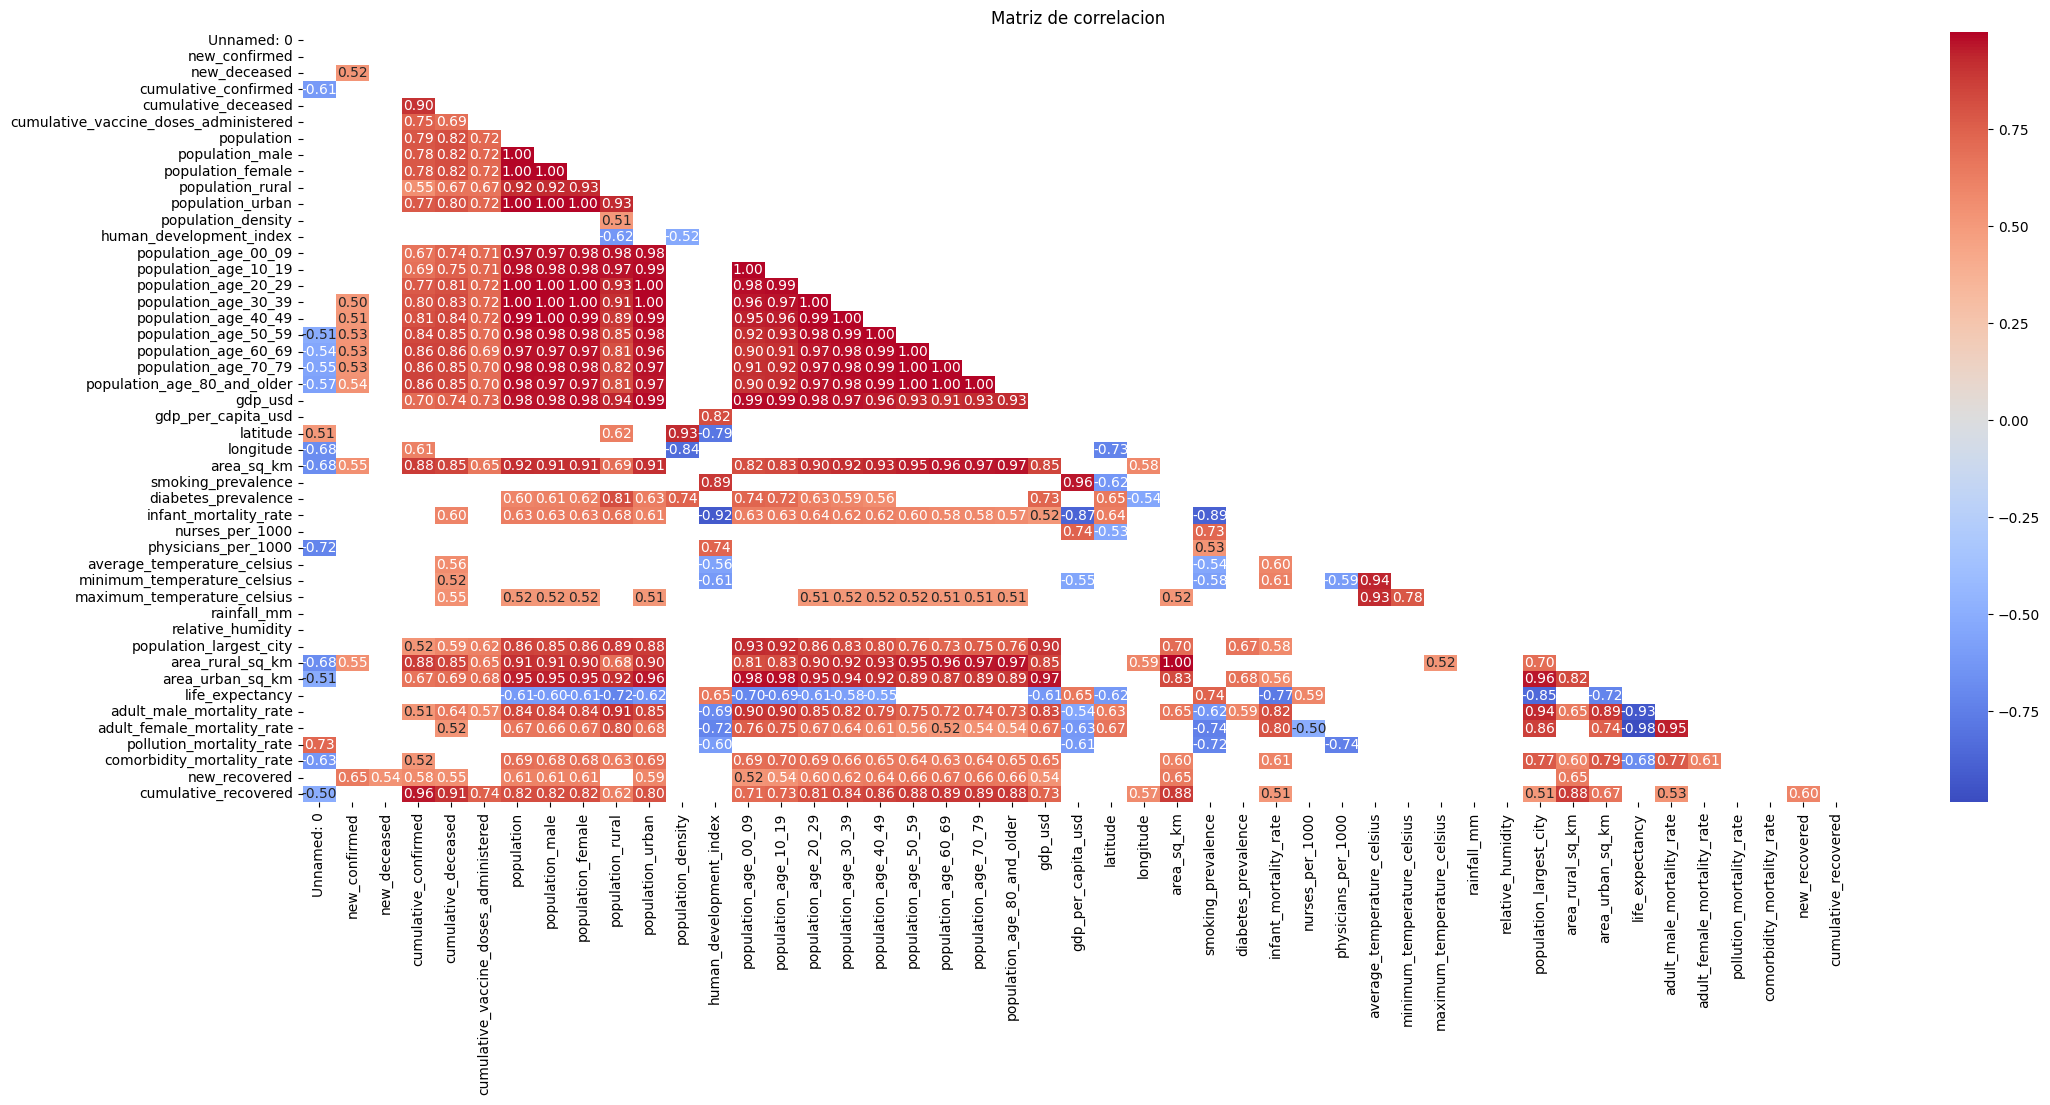

In [ ]:
#Se realiza la grafica

plt.figure(figsize = (25,10))
heatmap = sns.heatmap(matriz_correlacion , mask=mask , annot=True , cmap="coolwarm" , fmt=".2f")
plt.title('Matriz de correlacion')

plt.show()



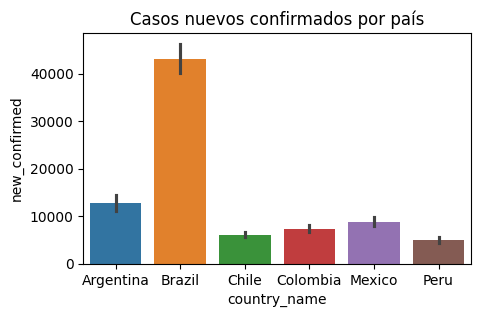

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x='country_name', y='new_confirmed', data=Data_latinoamerica_nuevo, ax=ax, hue='country_name')
plt.title('Casos nuevos confirmados por país')

plt.show()

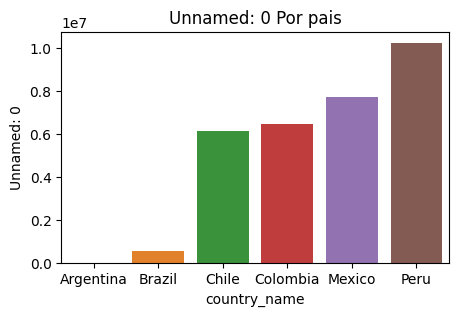

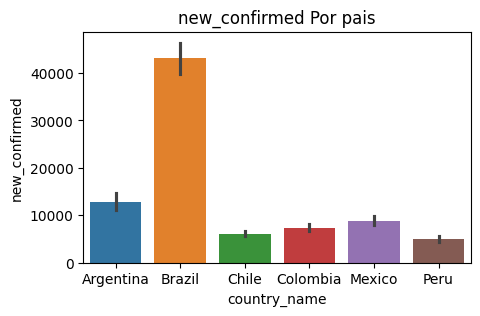

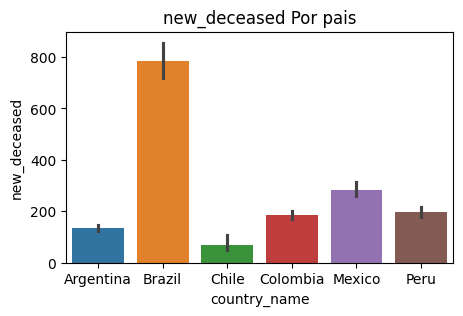

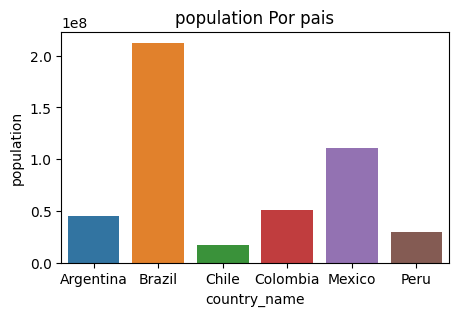

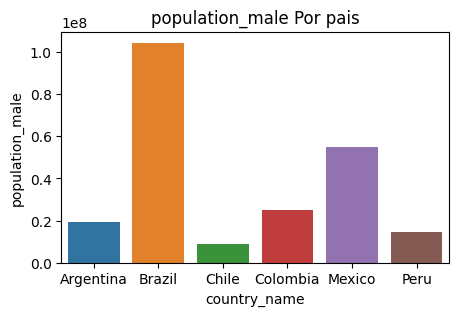

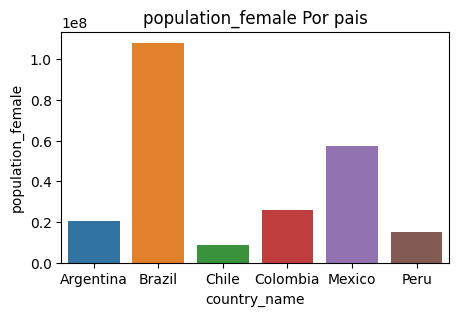

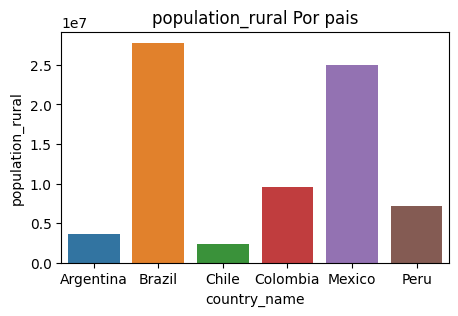

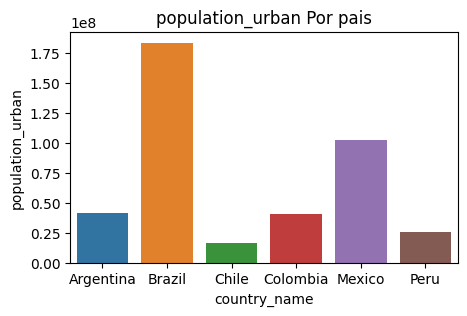

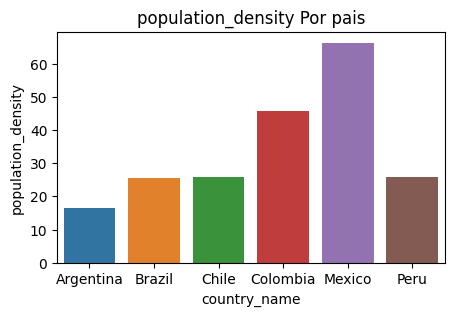

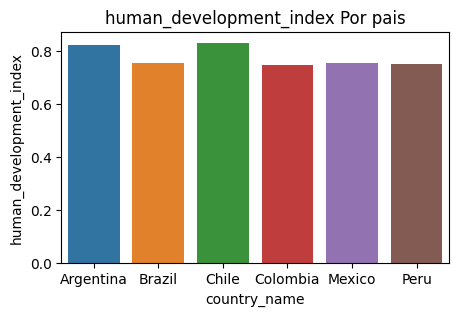

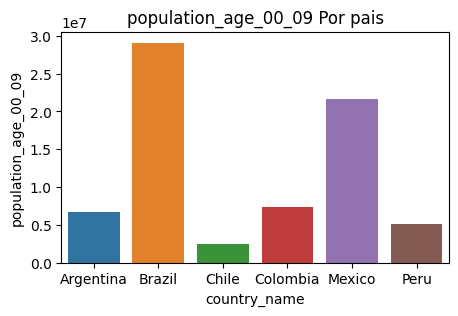

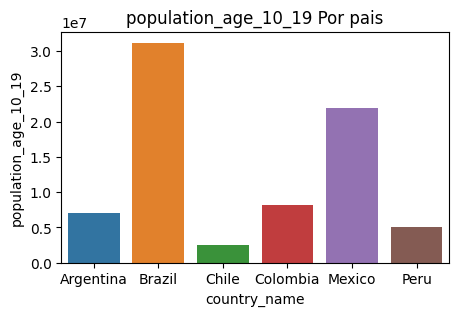

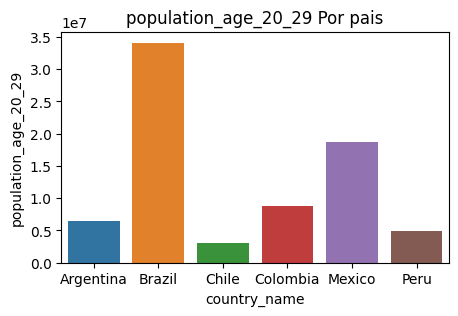

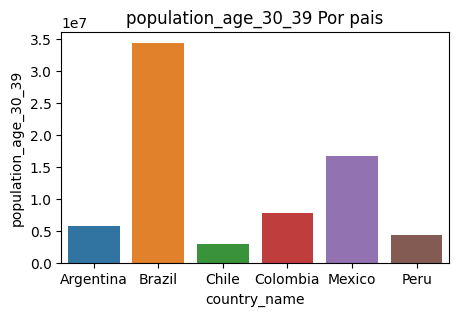

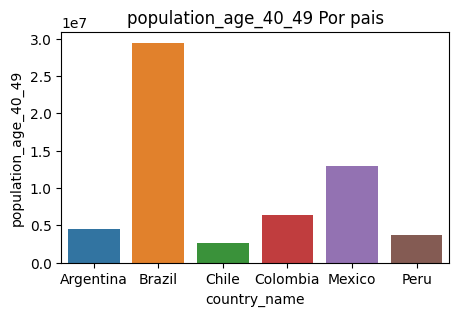

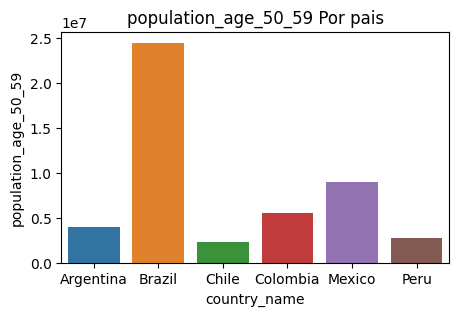

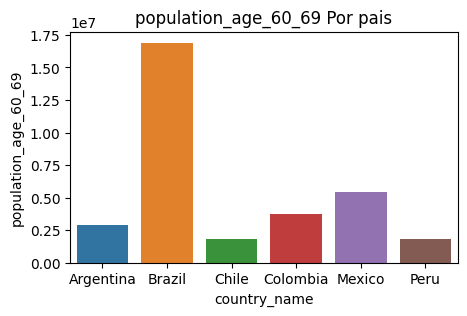

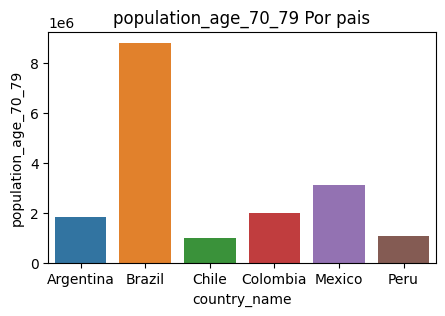

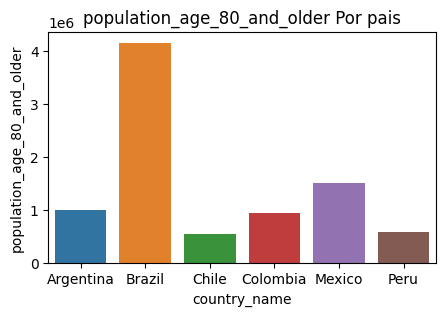

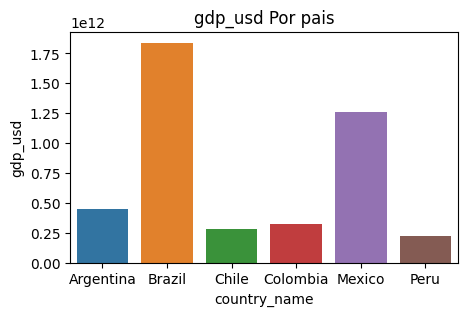

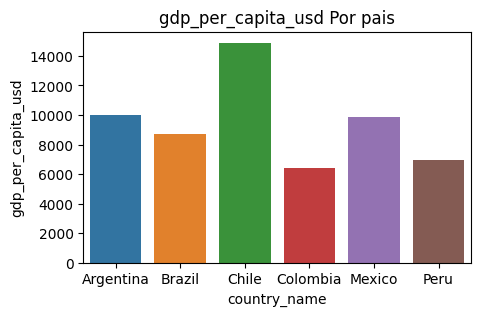

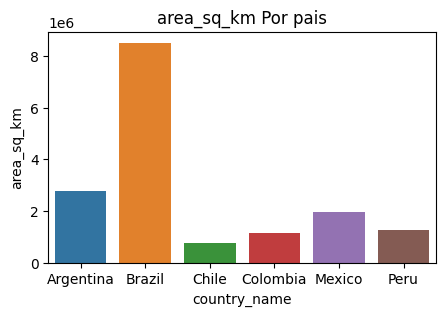

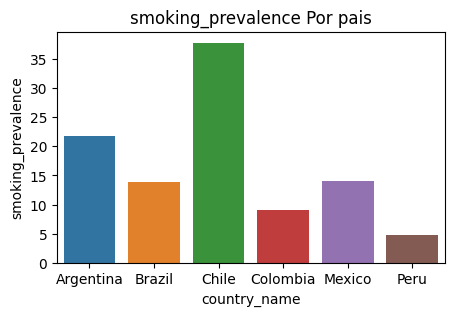

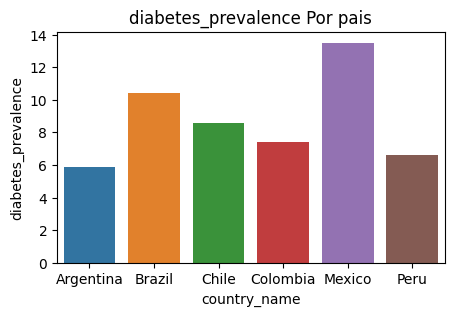

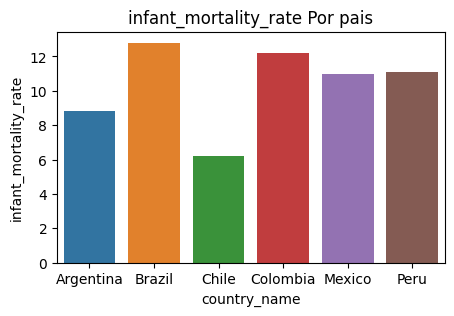

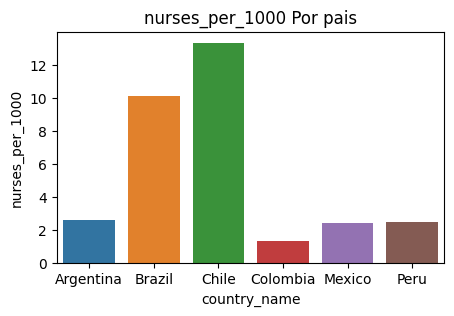

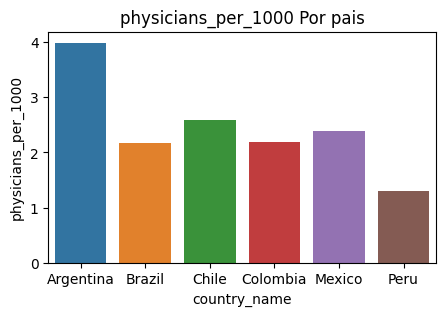

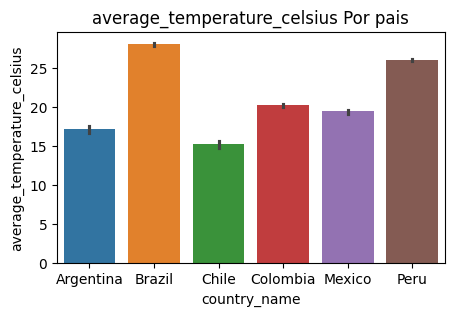

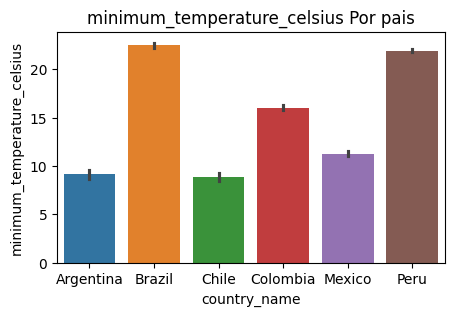

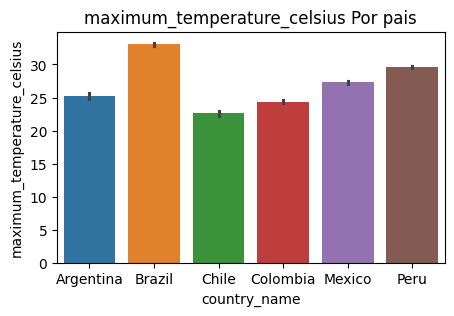

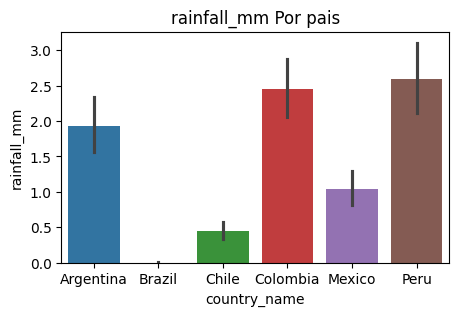

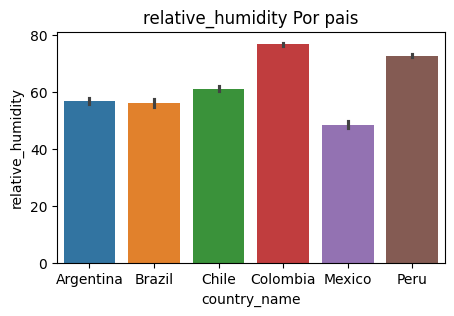

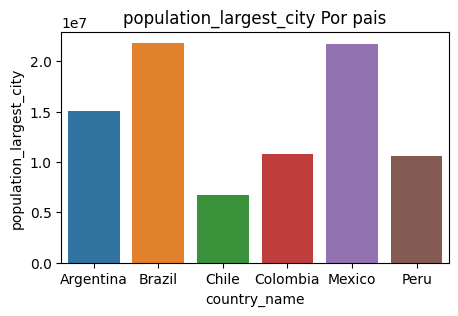

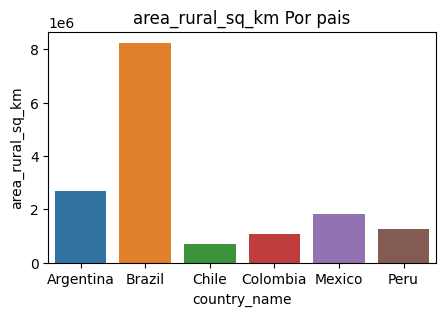

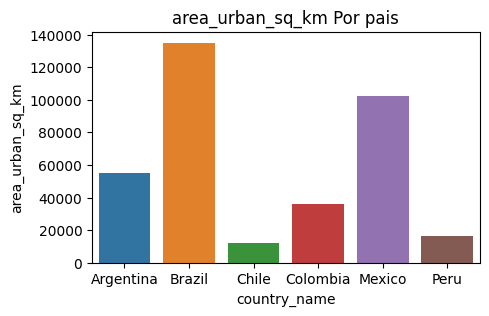

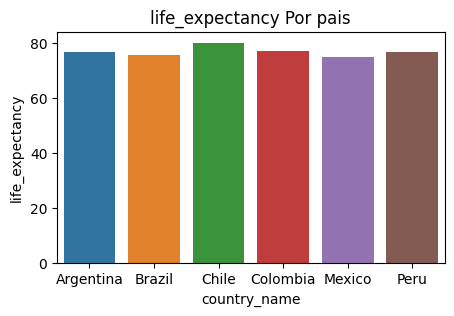

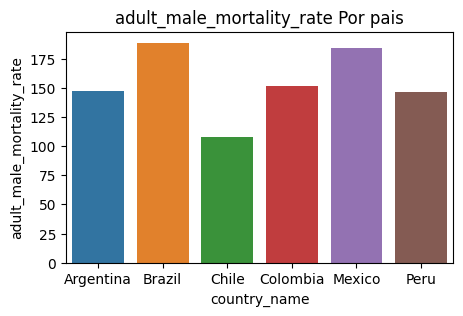

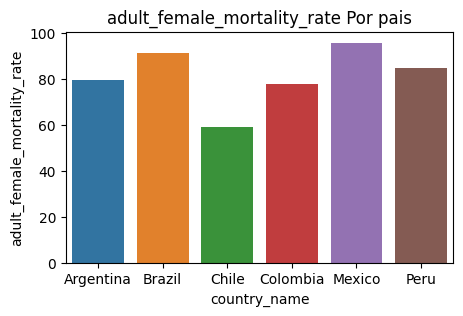

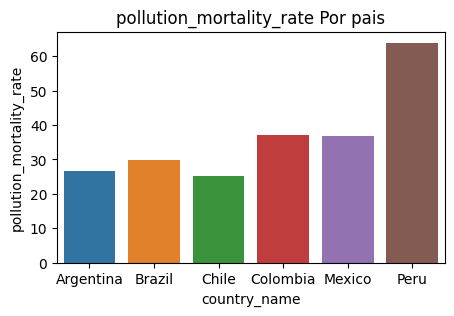

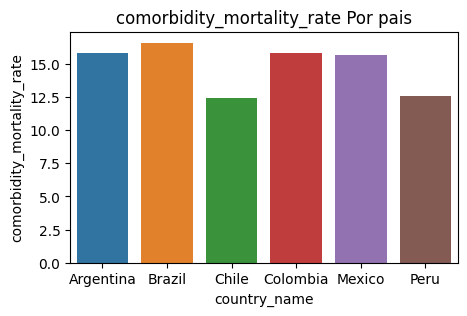

In [ ]:
# Iteramos sobre todas las columnas en el DataFrame 'Data_latinoamerica_nuevo'
for i in Data_latinoamerica_nuevo.columns:
    # Si la columna actual no está en la lista de columnas especificadas
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased'
               , 'cumulative_recovered','cumulative_vaccine_doses_administered', 'new_recovered']:
        # Creamos una nueva figura y un conjunto de subtramas con un tamaño específico
        fig, ax = plt.subplots(figsize = (5, 3))
        # Creamos un gráfico de barras con 'country_name' como eje x y la columna actual como eje y
        # Usamos 'country_name' como la leyenda (hue)
        sns.barplot(x='country_name', y=i, data=Data_latinoamerica_nuevo, ax=ax, hue='country_name')
        # Establecemos el título del gráfico como el nombre de la columna actual seguido de 'Por pais'
        plt.title(f'{i} Por pais')
        # Mostramos el gráfico
        plt.show()


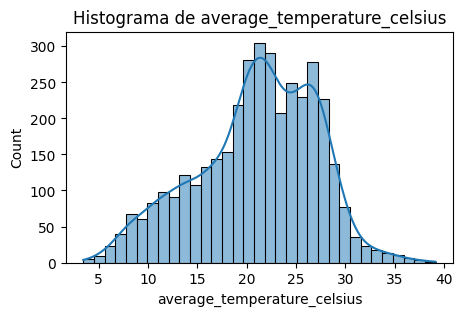

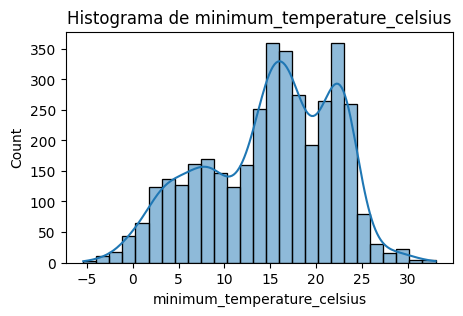

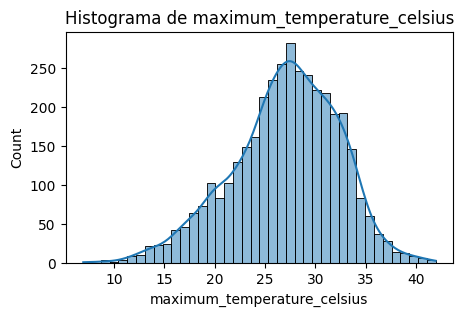

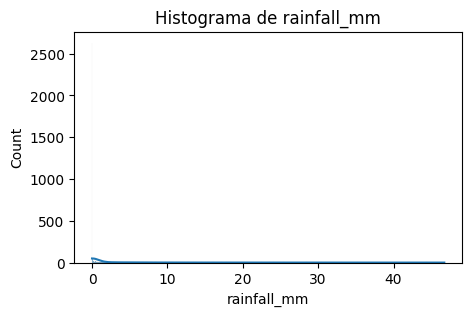

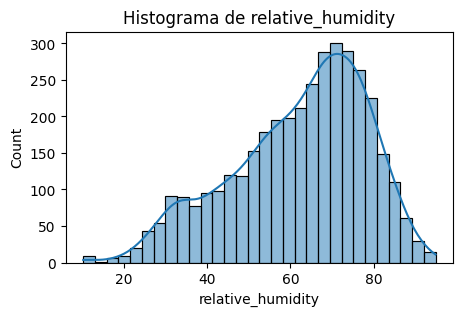

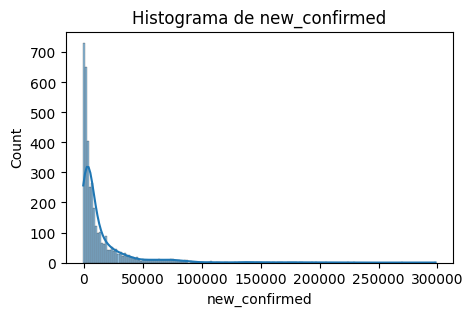

In [ ]:
# Definimos una lista de columnas para las cuales queremos generar histogramas
columnas_para_histograma = ['average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
                            'rainfall_mm', 'relative_humidity', 'new_confirmed']

# Iteramos sobre cada columna en la lista 'columnas_para_histograma'
for i in Data_latinoamerica_nuevo[columnas_para_histograma]:
    # Creamos una nueva figura y un conjunto de subtramas con un tamaño específico
    fig, ax = plt.subplots(figsize = (5, 3))
    # Creamos un histograma para la columna actual con una curva de densidad de kernel (kde)
    sns.histplot(data=Data_latinoamerica_nuevo, x=i, kde=True)
    # Establecemos el título del gráfico como 'Histograma de ' seguido del nombre de la columna actual
    plt.title(f'Histograma de {i}')
    # Mostramos el gráfico
    plt.show()


* Diagrama de dispersión de la temperatura media contra los casos confirmados. <br>
* Diagrama de dispersión de la temperatura media contra las muertes confirmadas.<br>
* Comportamiento de las dosis administradas de todos los países (Valor medio).<br>
* Evolución de dosis administradas por mes de cada país.<br>
* Muertes por mes de cada país.<br>
* Casos confirmados por mes de cada país.<br>
* Recuperaciones de casos por mes de cada país.<br>
* Comparación del Número de Casos Nuevos entre Países.<br>
* Dosis acumuladas por país<br>
* Boxplot de temperatura media de cada país.<br>
* Violinplot de las variables que “Sí” tenga cambios de valores.<br>
* Distribución de la población por grupos de edad.<br>
* Mapa de calor de Métricas por país.<br>
* Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.<br>
* Matriz de correlación de indicadores demográficos y de salud.<br>
* Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

Text(0.5, 1.0, 'Temperatura promedio vs Casos nuevos confirmados')

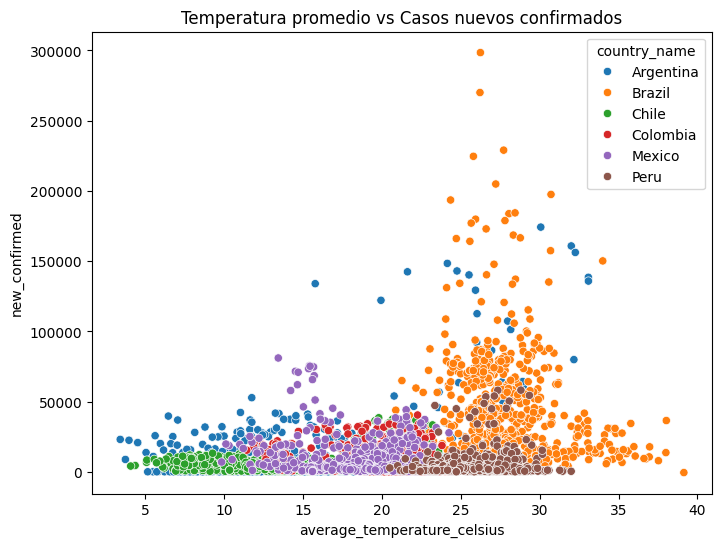

In [ ]:
# Diagrama de dispersion de average_temperature_celsius vs new_confirmed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('Temperatura promedio vs Casos nuevos confirmados')

Text(0.5, 1.0, 'Temperatura promedio vs Nuevos fallecidos')

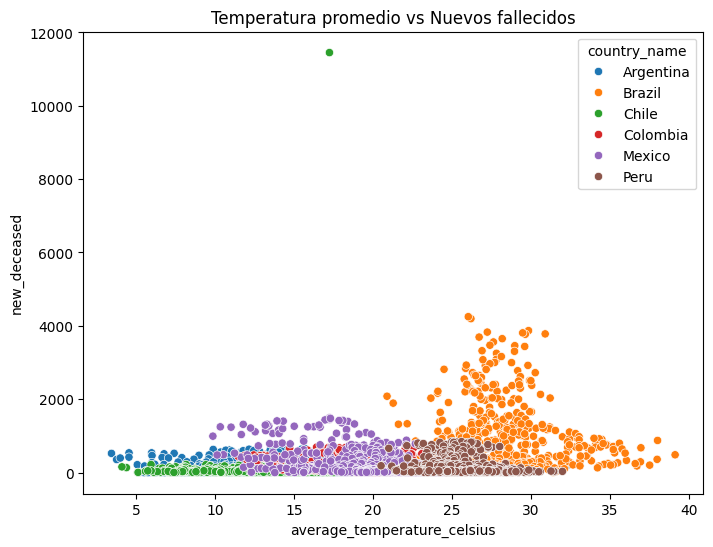

In [ ]:
# Average temperature vs new deceased
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('Temperatura promedio vs Nuevos fallecidos')

Text(0.5, 1.0, 'Dosis de vacunas administradas por país')

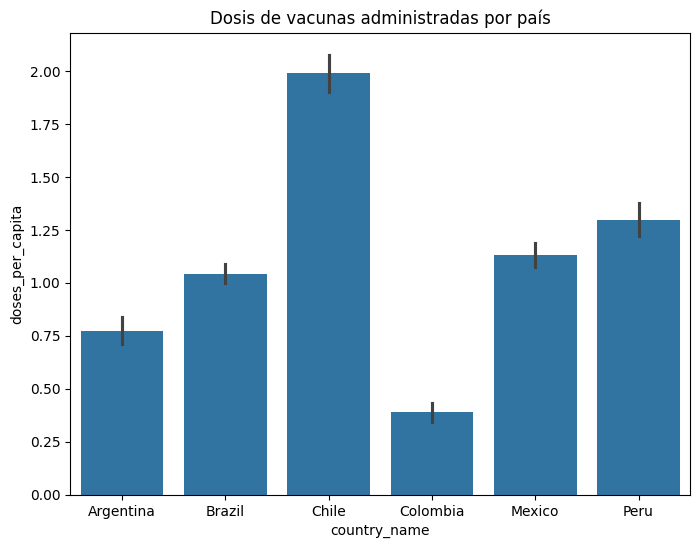

In [ ]:
#Dosis aplicadas por persona en cada pais

Data_latinoamerica_nuevo['doses_per_capita'] = Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']

plt.figure(figsize=(8, 6))
sns.barplot(x='country_name', y='doses_per_capita', data=Data_latinoamerica_nuevo)
plt.title('Dosis de vacunas administradas por país')

In [ ]:
Data_latinoamerica_nuevo['date'] = pd.to_datetime(Data_latinoamerica_nuevo['date'])
Data_latinoamerica_nuevo.set_index('date', inplace=True)

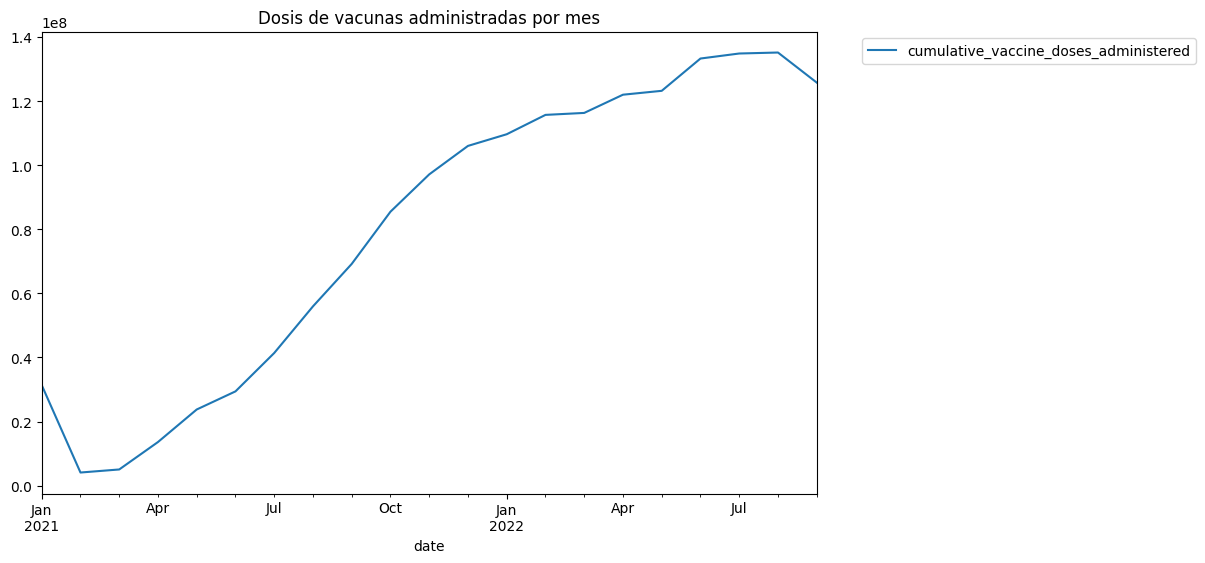

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Dosis de vacunas administradas por mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

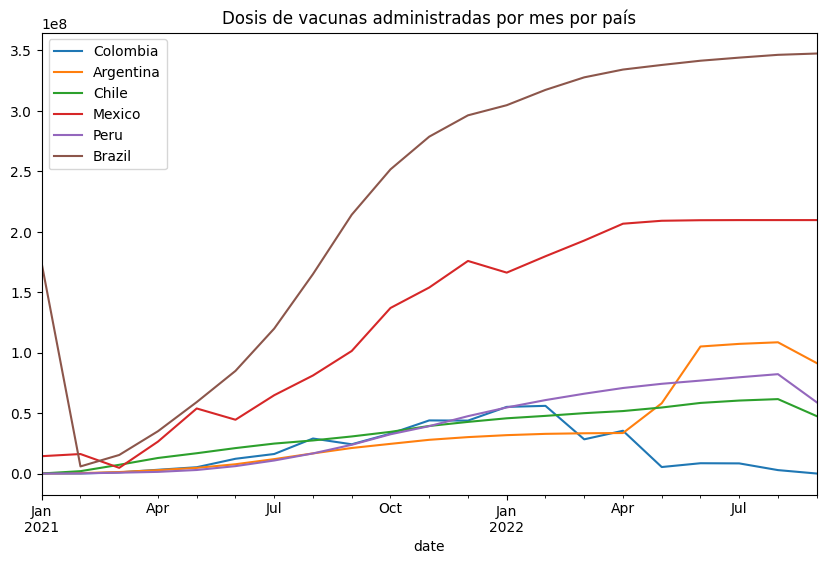

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Dosis de vacunas administradas por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

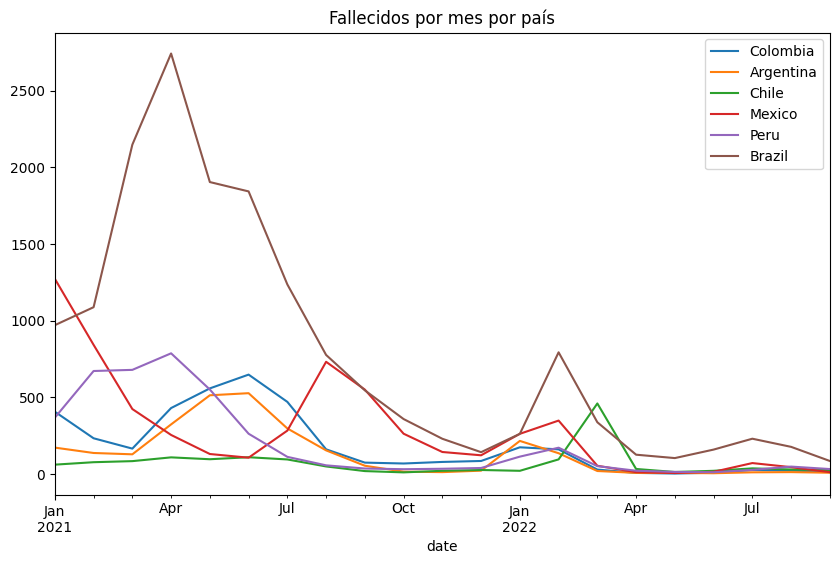

In [ ]:
#Fallecidos por mes por pais
fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['new_deceased'].plot()
plt.title('Fallecidos por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

In [ ]:
# Falla en los datos, un acumulado de fallecidos no puede disminuir

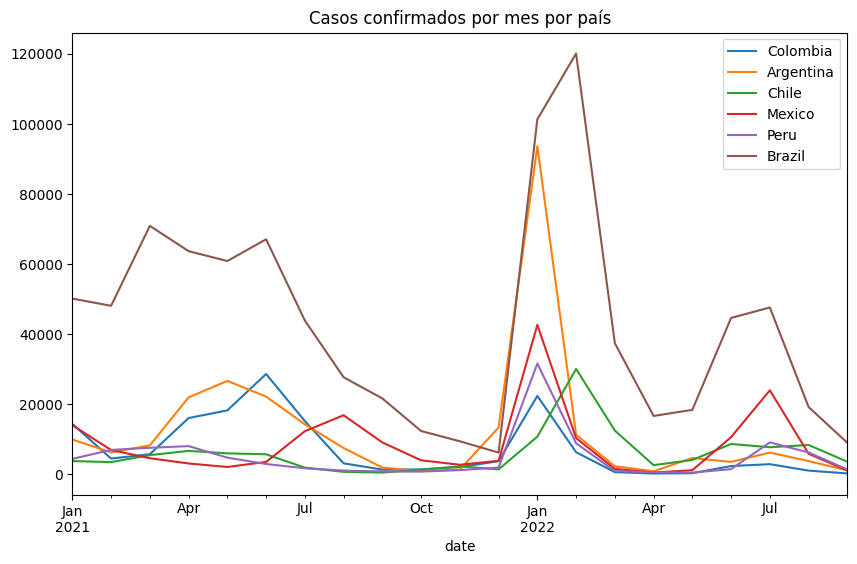

In [ ]:
# Casos confirmados por mes por pais
fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Casos confirmados por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

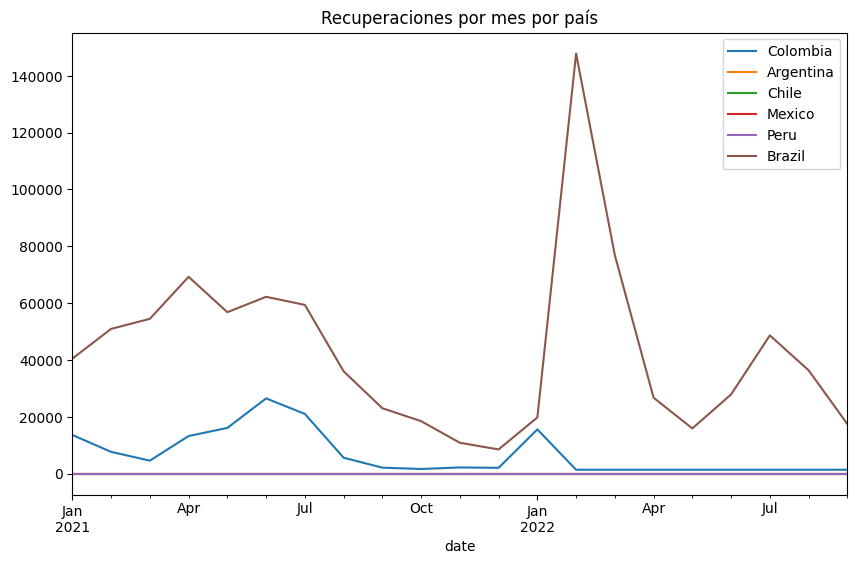

In [ ]:
# Recuperaciones por mes por pais
fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['new_recovered'].plot()
plt.title('Recuperaciones por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

In [ ]:
# Falta de datos en la columna 'new_recovered'

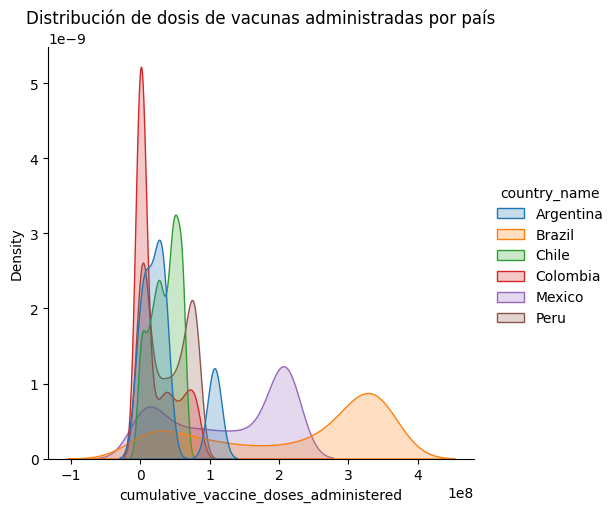

In [ ]:
# Distribucion de vacunas por pais
sns.displot(Data_latinoamerica_nuevo, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde', fill=True)
plt.title('Distribución de dosis de vacunas administradas por país')
plt.show()


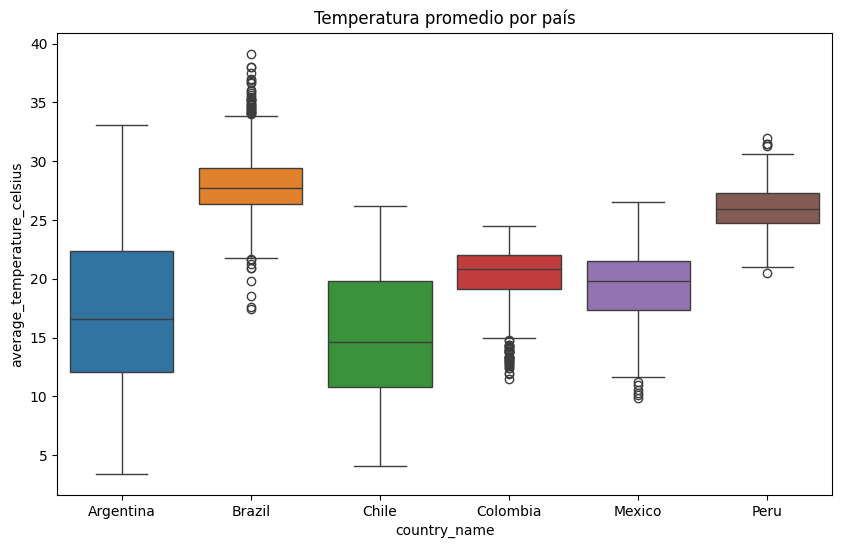

In [ ]:
# Temperatura media por pais
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('Temperatura promedio por país')
plt.show()

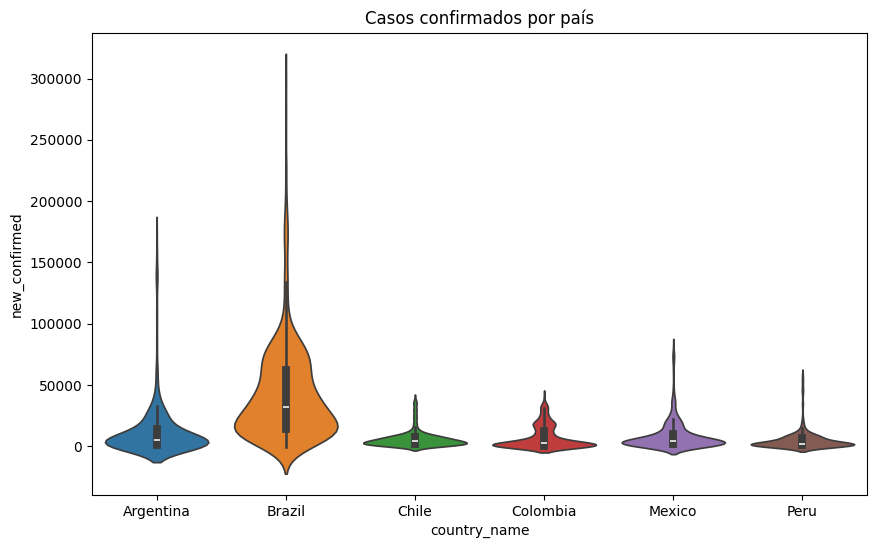

In [ ]:
# Violinplot de casos confirmados por pais
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='country_name', y='new_confirmed', data=Data_latinoamerica_nuevo, hue='country_name')
plt.title('Casos confirmados por país')
plt.show()


In [ ]:
# Reasignacion de grupo etario
Data_latinoamerica_nuevo['population_age_00_19'] = Data_latinoamerica_nuevo['population_age_00_09'] + Data_latinoamerica_nuevo['population_age_10_19']
Data_latinoamerica_nuevo['population_age_20_39'] = Data_latinoamerica_nuevo['population_age_20_29'] + Data_latinoamerica_nuevo['population_age_30_39']
Data_latinoamerica_nuevo['population_age_40_59'] = Data_latinoamerica_nuevo['population_age_40_49'] + Data_latinoamerica_nuevo['population_age_50_59']
Data_latinoamerica_nuevo['population_age_60_79'] = Data_latinoamerica_nuevo['population_age_60_69'] + Data_latinoamerica_nuevo['population_age_70_79']
Data_latinoamerica_nuevo['population_age_80_and_older']


date
2021-01-02    994030.0
2021-01-03    994030.0
2021-01-04    994030.0
2021-01-05    994030.0
2021-01-06    994030.0
                ...   
2022-09-13    573103.0
2022-09-14    573103.0
2022-09-15    573103.0
2022-09-16    573103.0
2022-09-17    573103.0
Name: population_age_80_and_older, Length: 3744, dtype: float64

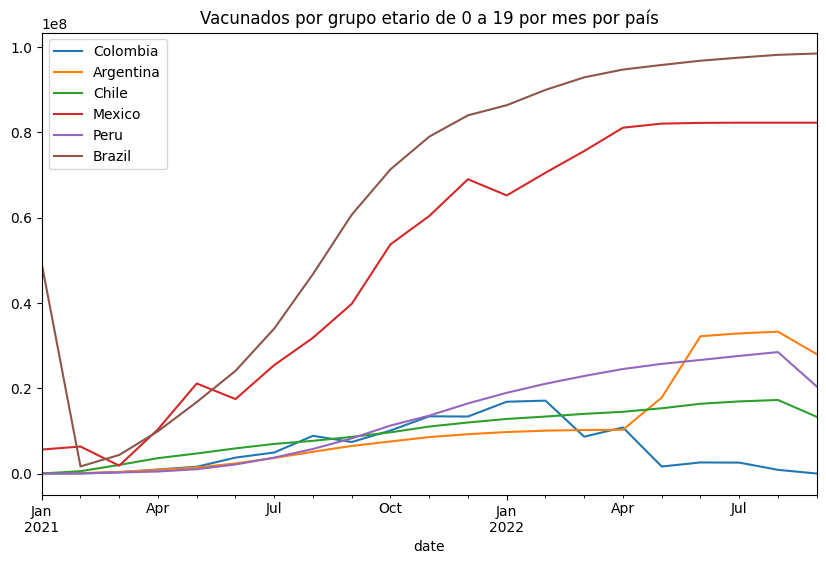

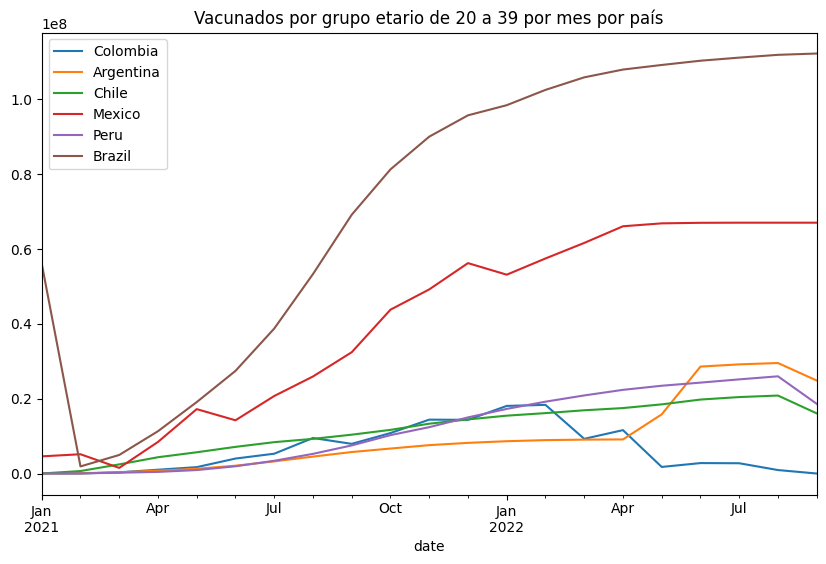

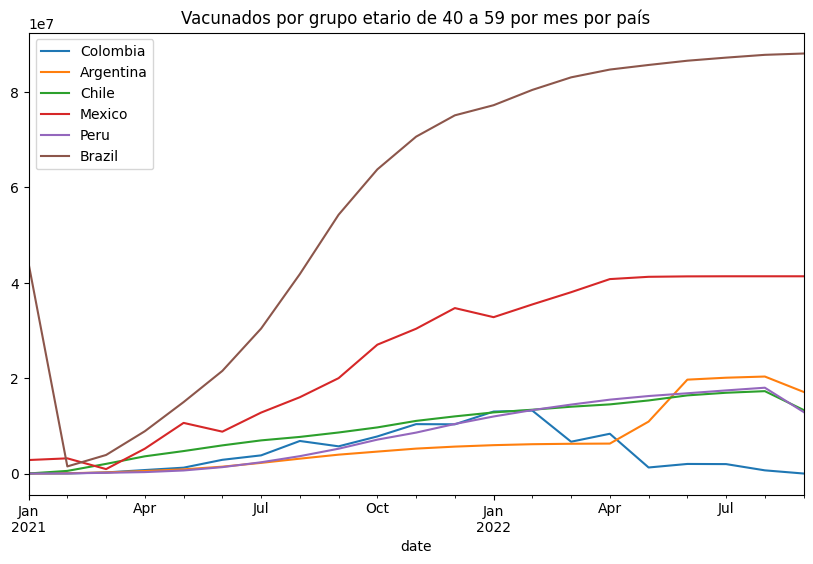

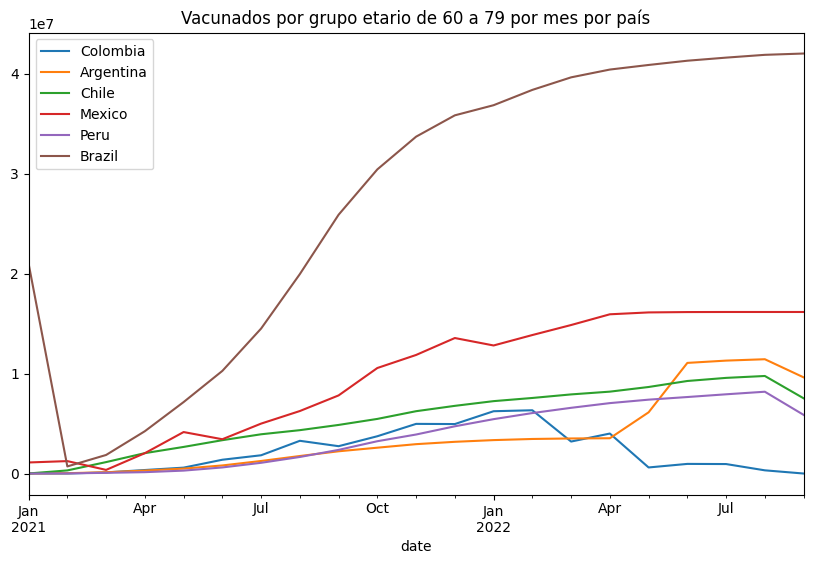

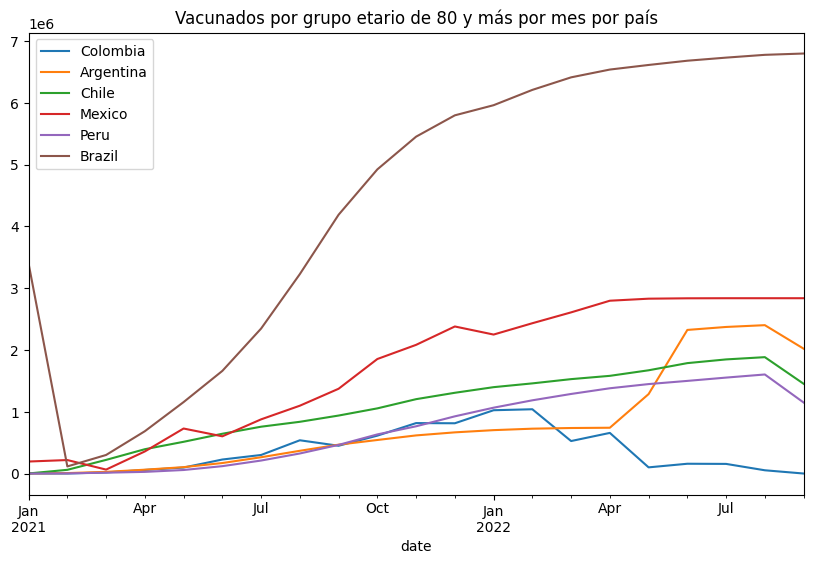

In [ ]:
# Grupo etario mas vacunado
Data_latinoamerica_nuevo['population_age_00_19_vacunados'] = Data_latinoamerica_nuevo['population_age_00_19'] * Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']
Data_latinoamerica_nuevo['population_age_20_39_vacunados'] = Data_latinoamerica_nuevo['population_age_20_39'] * Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']
Data_latinoamerica_nuevo['population_age_40_59_vacunados'] = Data_latinoamerica_nuevo['population_age_40_59'] * Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']
Data_latinoamerica_nuevo['population_age_60_79_vacunados'] = Data_latinoamerica_nuevo['population_age_60_79'] * Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']
Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'] = Data_latinoamerica_nuevo['population_age_80_and_older'] * Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population']

# Control de nulos
Data_latinoamerica_nuevo['population_age_00_19_vacunados'] = Data_latinoamerica_nuevo['population_age_00_19_vacunados'].fillna(0)
Data_latinoamerica_nuevo['population_age_20_39_vacunados'] = Data_latinoamerica_nuevo['population_age_20_39_vacunados'].fillna(0)
Data_latinoamerica_nuevo['population_age_40_59_vacunados'] = Data_latinoamerica_nuevo['population_age_40_59_vacunados'].fillna(0)
Data_latinoamerica_nuevo['population_age_60_79_vacunados'] = Data_latinoamerica_nuevo['population_age_60_79_vacunados'].fillna(0)
Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'] = Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'].fillna(0)

# Asignar tipo de dato int

Data_latinoamerica_nuevo['population_age_00_19_vacunados'] = Data_latinoamerica_nuevo['population_age_00_19_vacunados'].astype(int)
Data_latinoamerica_nuevo['population_age_20_39_vacunados'] = Data_latinoamerica_nuevo['population_age_20_39_vacunados'].astype(int)
Data_latinoamerica_nuevo['population_age_40_59_vacunados'] = Data_latinoamerica_nuevo['population_age_40_59_vacunados'].astype(int)
Data_latinoamerica_nuevo['population_age_60_79_vacunados'] = Data_latinoamerica_nuevo['population_age_60_79_vacunados'].astype(int)
Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'] = Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'].astype(int)

#Sum de vacunados por grupo etario
Data_latinoamerica_nuevo['population_age_00_19_vacunados'].sum()
Data_latinoamerica_nuevo['population_age_20_39_vacunados'].sum()
Data_latinoamerica_nuevo['population_age_40_59_vacunados'].sum()
Data_latinoamerica_nuevo['population_age_60_79_vacunados'].sum()
Data_latinoamerica_nuevo['population_age_80_and_older_vacunados'].sum()

#Graficas
fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunados por grupo etario de 0 a 19 por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunados por grupo etario de 20 a 39 por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunados por grupo etario de 40 a 59 por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunados por grupo etario de 60 a 79 por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for i in Nombre_Paises_Nuevo:
    Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunados por grupo etario de 80 y más por mes por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(Nombre_Paises_Nuevo)
plt.show()


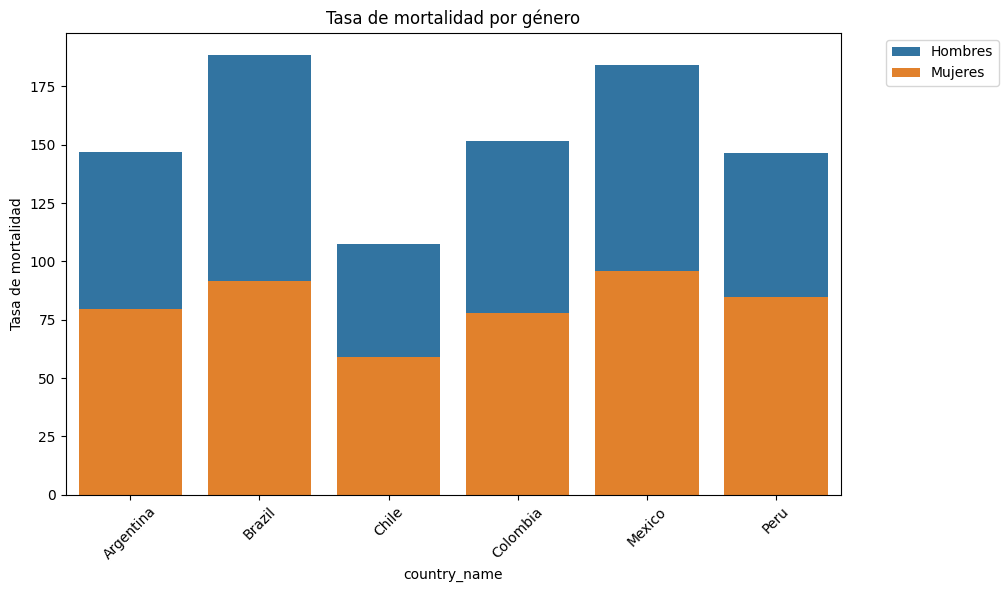

In [ ]:
# Grafico de barras apiladas de mortalidad por genero
plt.figure(figsize=(10, 6))
sns.barplot(data= Data_latinoamerica_nuevo, x = 'country_name' , y = 'adult_male_mortality_rate', label = 'Hombres')
sns.barplot(data= Data_latinoamerica_nuevo, x = 'country_name', y = 'adult_female_mortality_rate', label = 'Mujeres')
plt.xticks(rotation=45)
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortalidad por género')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


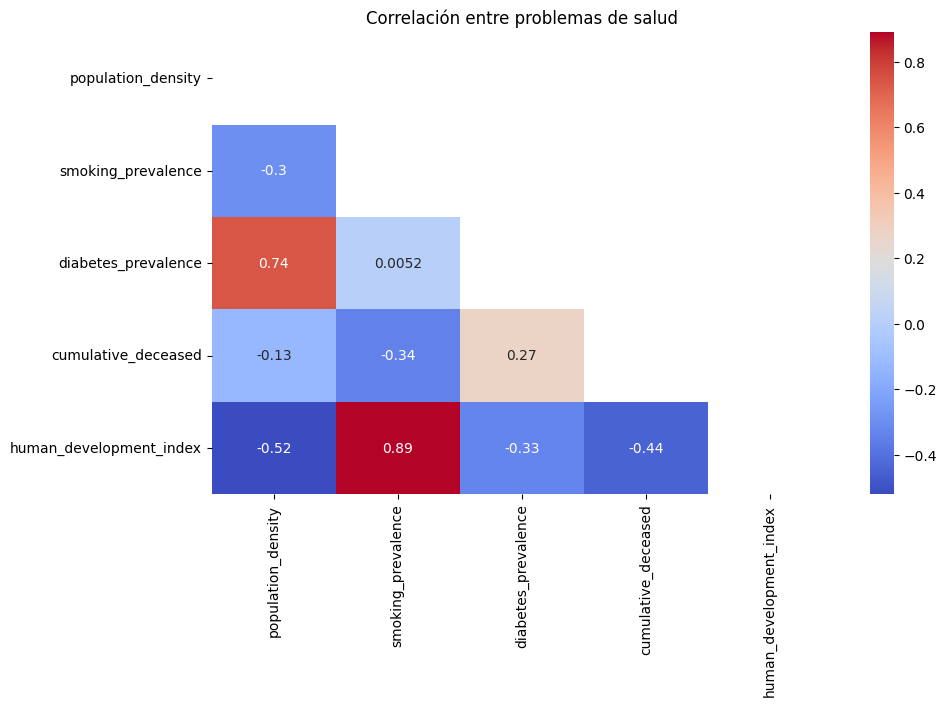

In [ ]:
# Correlaion entre problemas de salud
columnas = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = Data_latinoamerica_nuevo[columnas].corr()
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask,  cmap='coolwarm')


plt.title('Correlación entre problemas de salud')
plt.show()

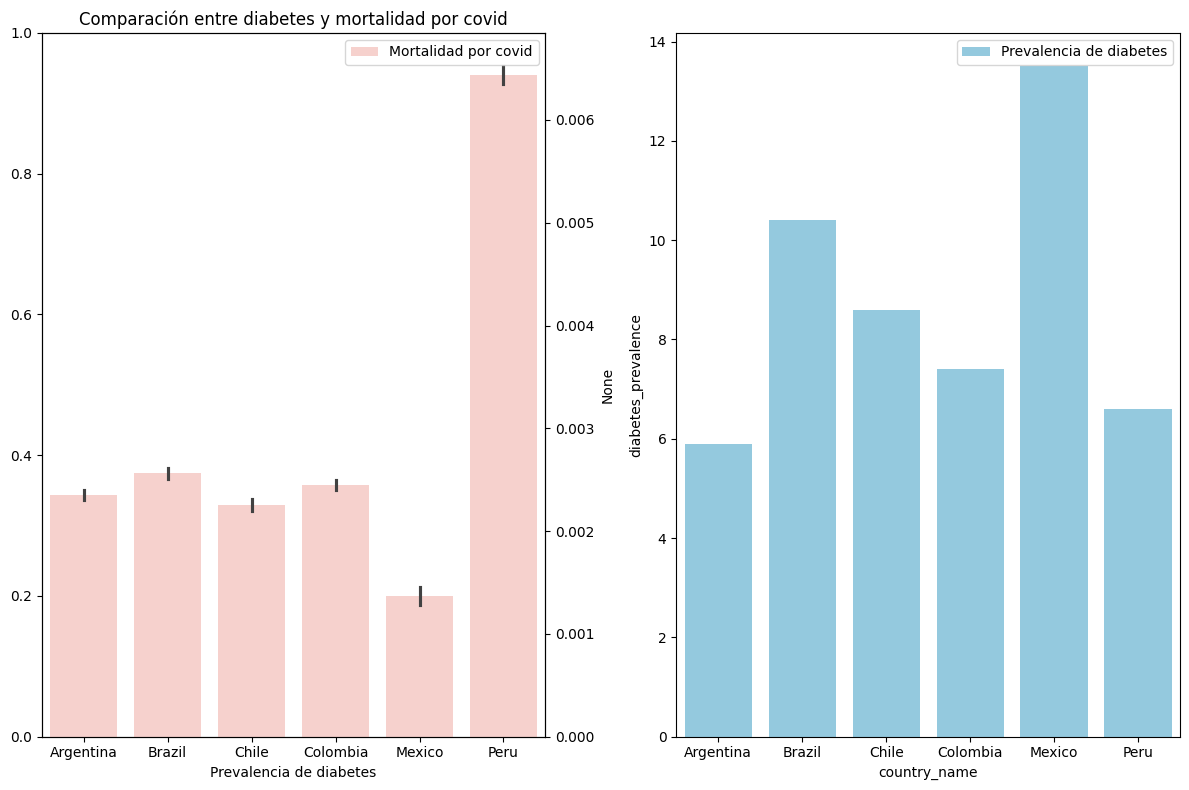

In [ ]:
Data_latinoamerica_nuevo['cumulative_deceased'] = pd.to_numeric(Data_latinoamerica_nuevo['cumulative_deceased'], errors='coerce')
Data_latinoamerica_nuevo['population'] = pd.to_numeric(Data_latinoamerica_nuevo['population'], errors='coerce')

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y='diabetes_prevalence', color='skyblue', label='Prevalencia de diabetes')
ax2 = ax.twinx()
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y=Data_latinoamerica_nuevo['cumulative_deceased'] / Data_latinoamerica_nuevo['population'], color='salmon', ax=ax2,
            label='Mortalidad por covid', alpha=0.4)
plt.title('Comparación entre diabetes y mortalidad por covid')
ax.set_xlabel('Prevalencia de diabetes')
ax2.set_xlabel('Mortalidad por covid')
plt.tight_layout()
plt.show()

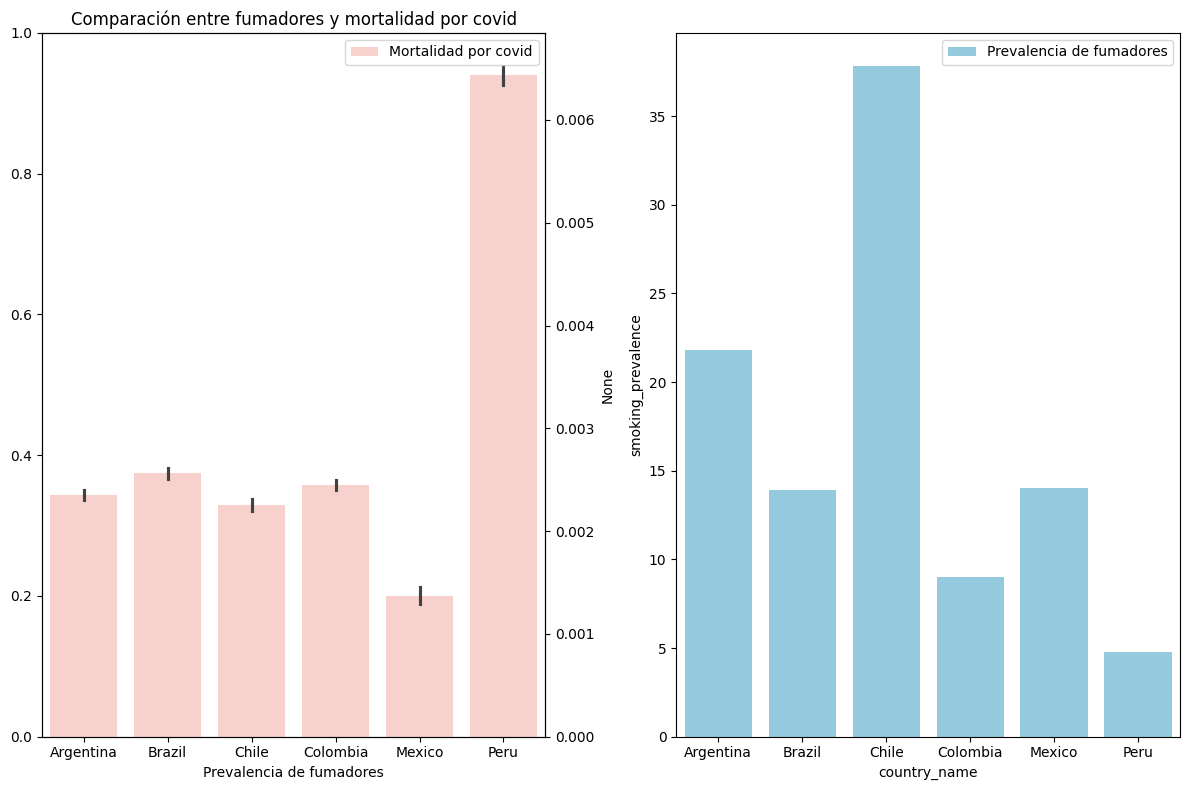

In [ ]:
# Comparacion entre smoking prevalence y mortalidad por covid
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y='smoking_prevalence', color='skyblue', label='Prevalencia de fumadores')
ax2 = ax.twinx()
sns.barplot(data=Data_latinoamerica_nuevo, x='country_name', y=Data_latinoamerica_nuevo['cumulative_deceased'] / Data_latinoamerica_nuevo['population'], color='salmon', ax=ax2,
            label='Mortalidad por covid', alpha=0.4)
plt.title('Comparación entre fumadores y mortalidad por covid')
ax.set_xlabel('Prevalencia de fumadores')
ax2.set_xlabel('Mortalidad por covid')
plt.tight_layout()
plt.show()

## Avance 3

*    Evolución de Casos Activos vs. Recuperados
*    Tasa de Crecimiento (%)
*    Relación entre la Cobertura de Vacunación y la Reducción de Casos
*    ('País') Progreso de la vacunación por país
*    Nuevos casos y temperatura promedio
*    Impacto de la Urbanización en la Propagación del Covid-19
*    Evolución Semanal de Casos Nuevos
*    Evolución Anual de Casos Nuevos
*    Distribución de la Población por Edad en Países
*    Comparación de Estrategias de Vacunación en América Latina
*    Evolución del Número de Muertes Diarias.
*    Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de       Mortalidad
*    Variación Mensual de Casos y Muertes
*    Análisis Temporal de la Mortalidad/
*    Comparación de la Situación Actual (Contexto de los datos)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


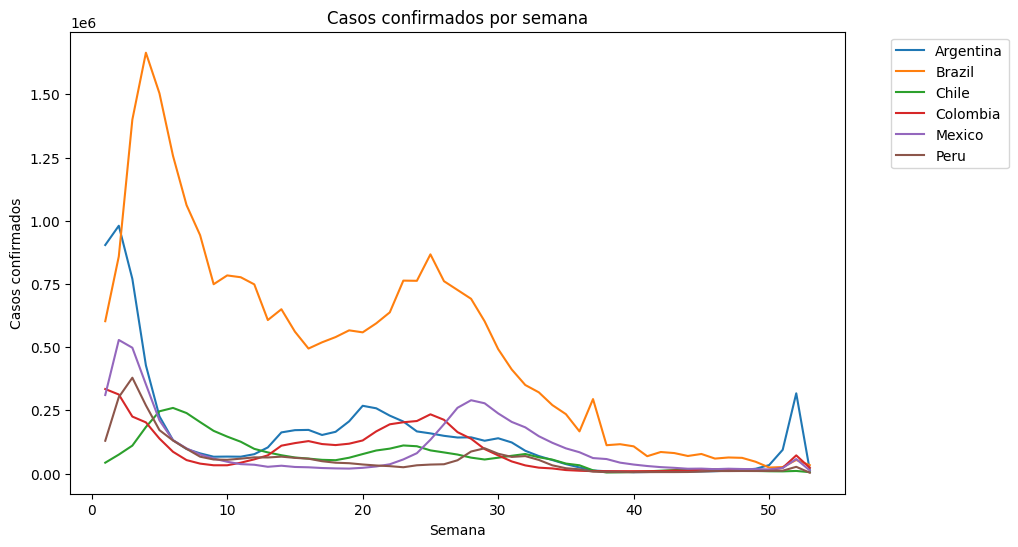

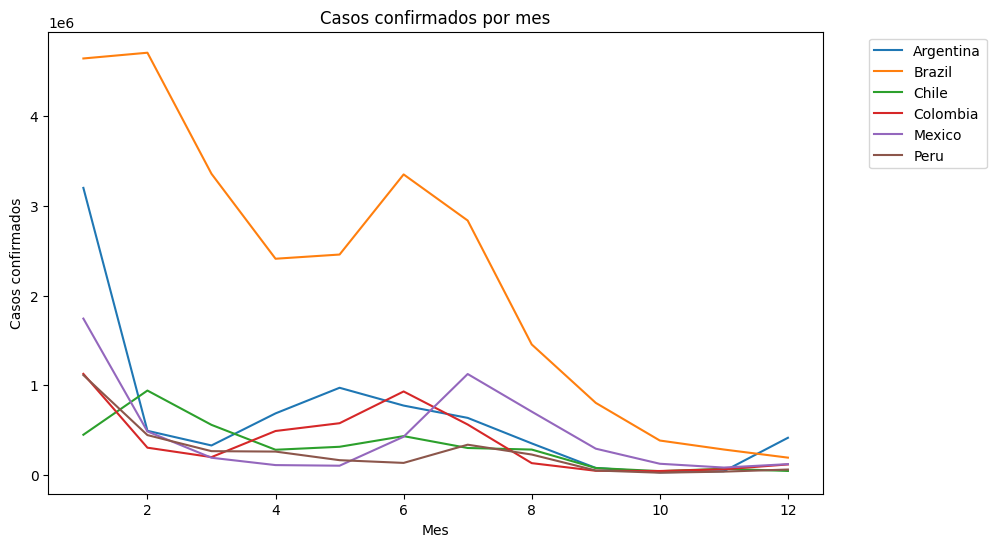

In [ ]:
Data_latinoamerica_nuevo['year'] = Data_latinoamerica_nuevo.index.isocalendar().year
Data_latinoamerica_nuevo['week'] = Data_latinoamerica_nuevo.index.isocalendar().week

weekly_cases = Data_latinoamerica_nuevo.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10, 6))
for i in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == i]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=i)

plt.xlabel('Semana')
plt.ylabel('Casos confirmados')
plt.title('Casos confirmados por semana')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#month
Data_latinoamerica_nuevo['month'] = Data_latinoamerica_nuevo.index.month
monthly_cases = Data_latinoamerica_nuevo.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10, 6))
for i in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == i]
    plt.plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=i)

plt.xlabel('Mes')
plt.ylabel('Casos confirmados')
plt.title('Casos confirmados por mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

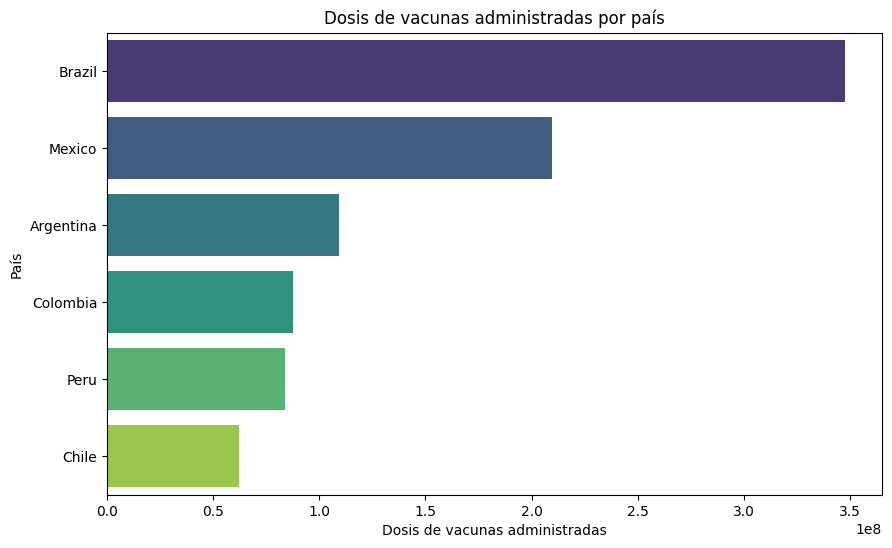

In [ ]:
data_vacunacion = Data_latinoamerica_nuevo.groupby(['country_name'])['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index, hue = data_vacunacion.index , palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Dosis de vacunas administradas por país')
plt.show()

/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/1097626079.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True).index, Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['average_temperature_celsius'], 'g-')
/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/1097626079.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True).index, Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'], 'b-')


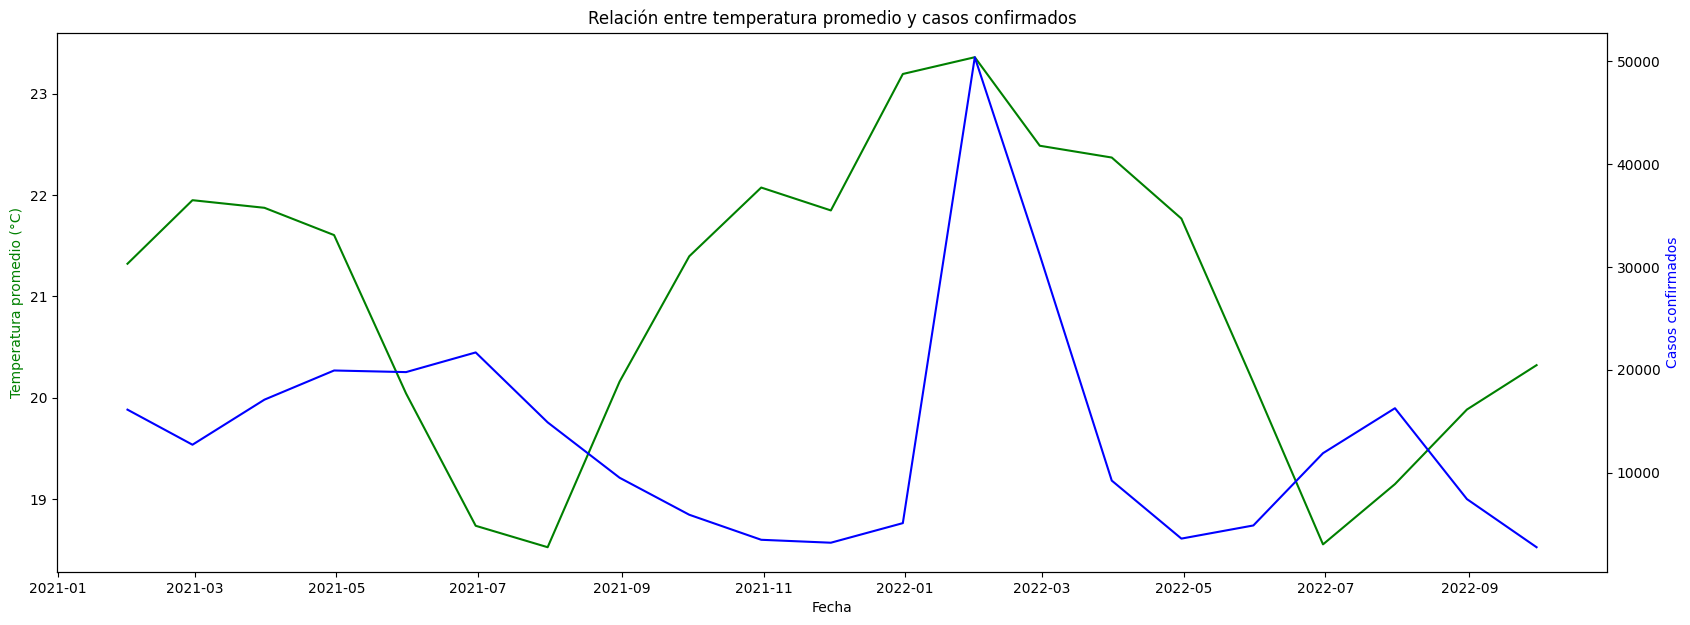

In [ ]:
#Relacion entre temperatura y casos confirmados
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True).index, Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['average_temperature_celsius'], 'g-')
ax2.plot(Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True).index, Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'], 'b-')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura promedio (°C)', color='g')
ax2.set_ylabel('Casos confirmados', color='b')
plt.title('Relación entre temperatura promedio y casos confirmados')
plt.show()

/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/1843163344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentaje'], y=urban_cases.index, palette='viridis')


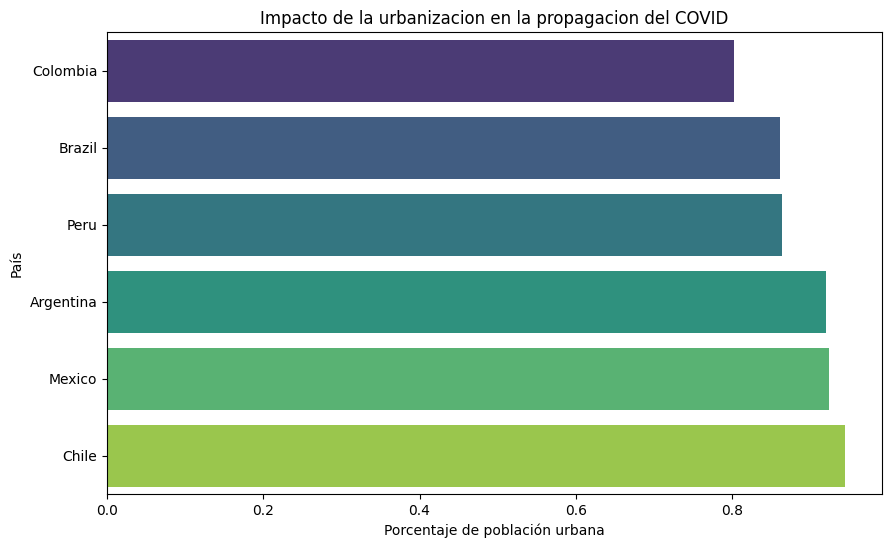

In [ ]:
# Impacto de la urbanzacion en la propagacion del COVID
Data_latinoamerica_nuevo['urban_population_percentaje'] = Data_latinoamerica_nuevo['population_urban'] / Data_latinoamerica_nuevo['population']
urban_cases = Data_latinoamerica_nuevo.groupby('country_name').last().sort_values(by='urban_population_percentaje')

plt.figure(figsize=(10, 6))
sns.barplot(x=urban_cases['urban_population_percentaje'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de población urbana')
plt.ylabel('País')
plt.title('Impacto de la urbanizacion en la propagacion del COVID')
plt.show()

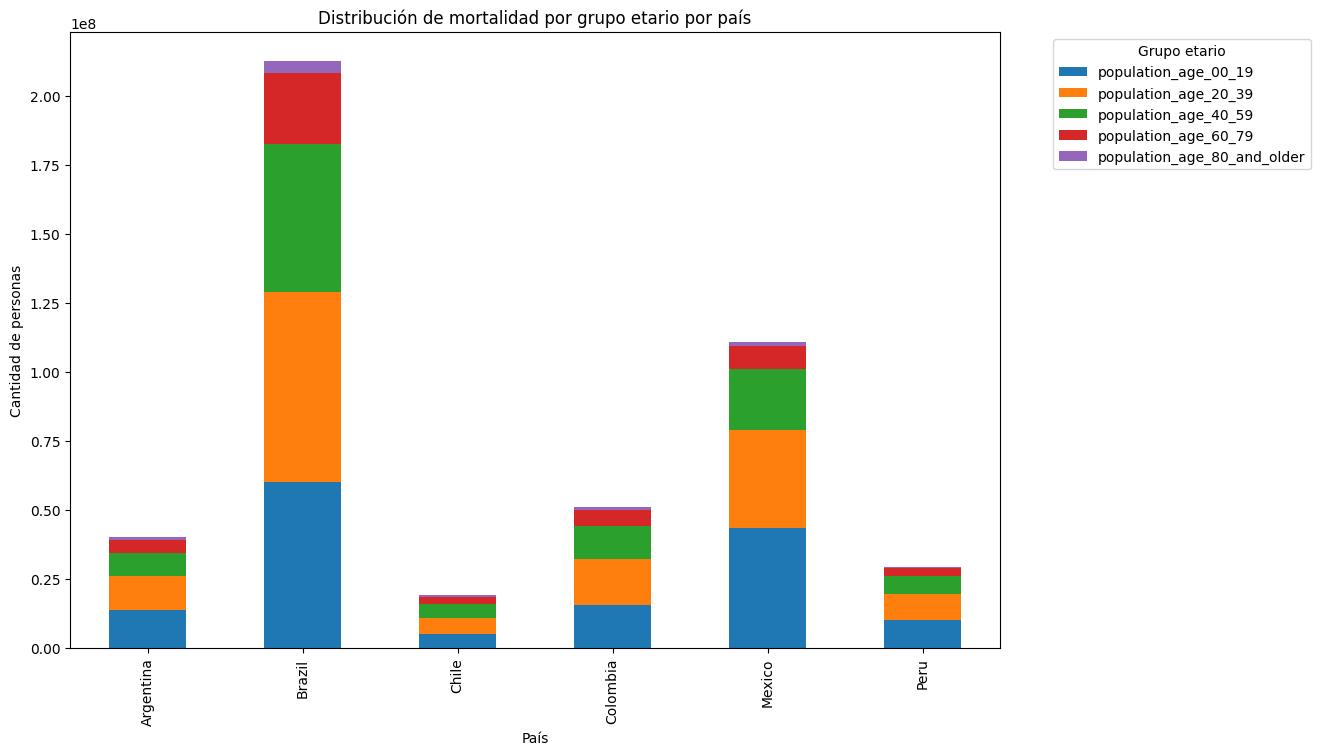

In [ ]:

#Distribucion de mortalidad por grupo etario por pais
high_mortality = Data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=True).index
age_groups = ['population_age_00_19', 'population_age_20_39', 'population_age_40_59', 'population_age_60_79', 'population_age_80_and_older']
age_distribution = Data_latinoamerica_nuevo[Data_latinoamerica_nuevo['country_name'].isin(high_mortality)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de mortalidad por grupo etario por país')
plt.legend(title='Grupo etario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



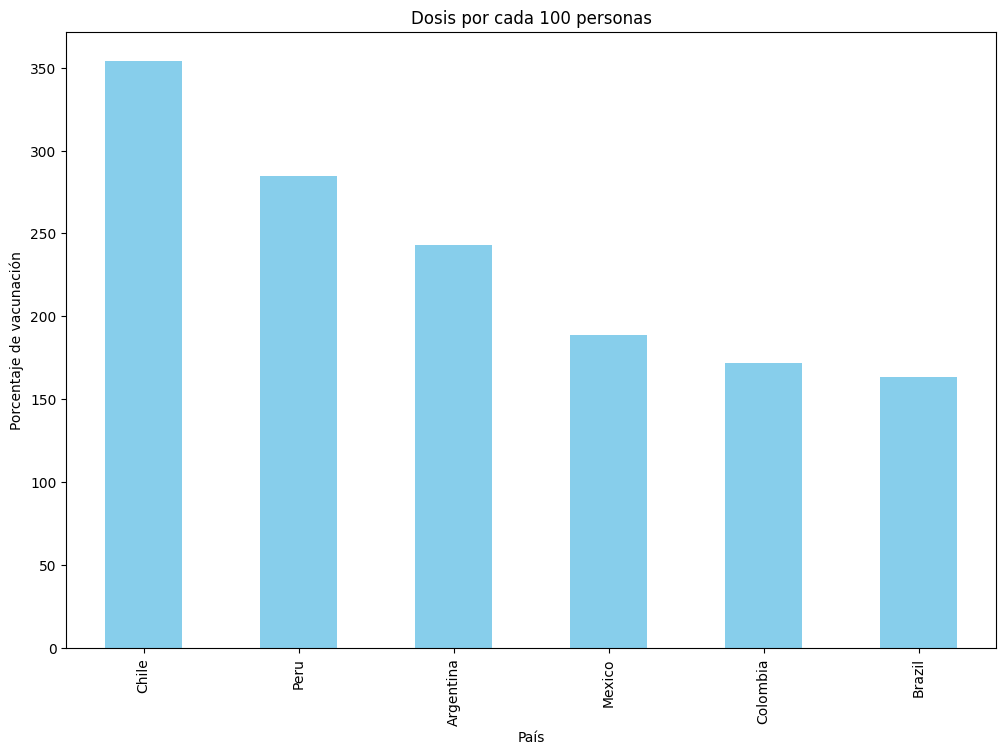

In [ ]:
vaccination_strategy = Data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / Data_latinoamerica_nuevo.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.xlabel('País')
plt.ylabel('Porcentaje de vacunación')
plt.title('Dosis por cada 100 personas')
plt.show()



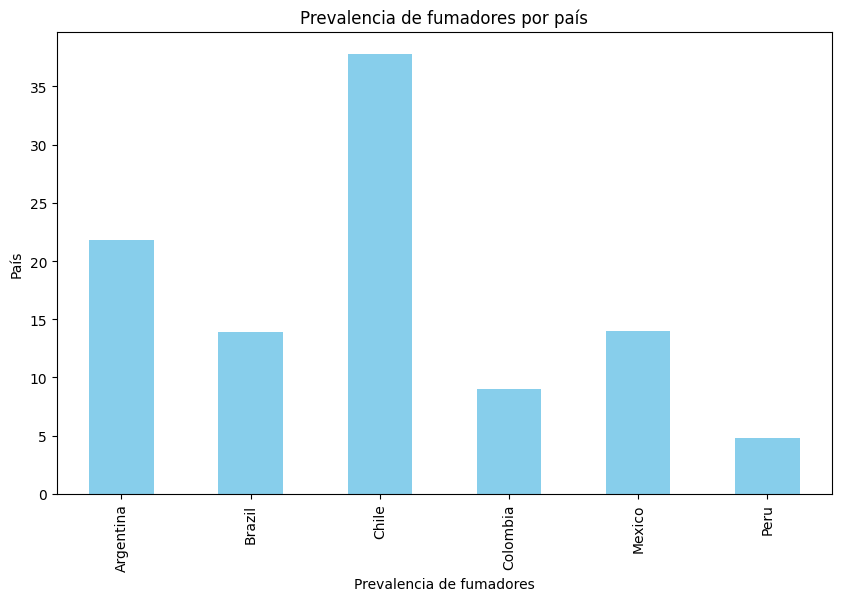

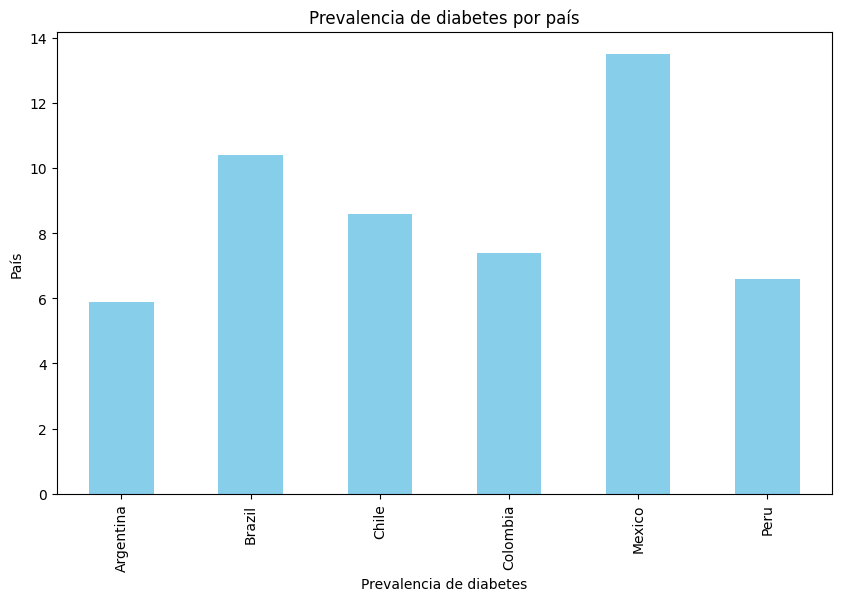

In [ ]:
# Smoking prevalence por pais
smoking_prevalence = Data_latinoamerica_nuevo.groupby('country_name')['smoking_prevalence'].max()
plt.figure(figsize=(10, 6))
smoking_prevalence.plot(kind='bar', color='skyblue')
plt.xlabel('Prevalencia de fumadores')
plt.ylabel('País')
plt.title('Prevalencia de fumadores por país')
plt.show()

# Diabetes prevalence por pais
diabetes_prevalence = Data_latinoamerica_nuevo.groupby('country_name')['diabetes_prevalence'].max()
plt.figure(figsize=(10, 6))
diabetes_prevalence.plot(kind='bar', color='skyblue')
plt.xlabel('Prevalencia de diabetes')
plt.ylabel('País')
plt.title('Prevalencia de diabetes por país')
plt.show()

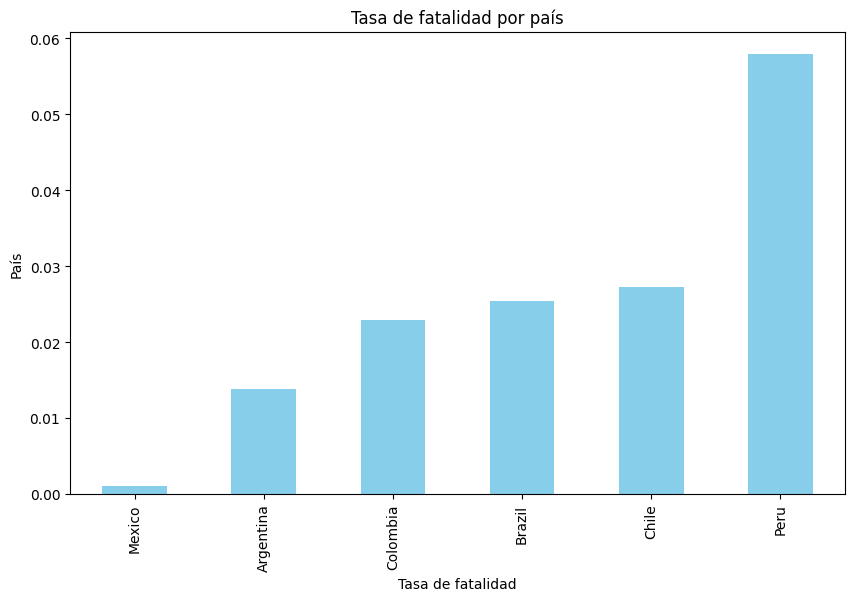

In [ ]:
# Tasa de fatalidad
Data_latinoamerica_nuevo['fatality_rate'] = Data_latinoamerica_nuevo['cumulative_deceased'] / Data_latinoamerica_nuevo['cumulative_confirmed']
fatality_rate = Data_latinoamerica_nuevo.groupby('country_name')['fatality_rate'].last().sort_values()

plt.figure(figsize=(10, 6))
fatality_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Tasa de fatalidad')
plt.ylabel('País')
plt.title('Tasa de fatalidad por país')
plt.show()


/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/2106499077.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='g', label='Casos confirmados')
/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/2106499077.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['vaccination_percentage'].plot(ax=ax2, color='b', label='Porcentaje de vacunación')


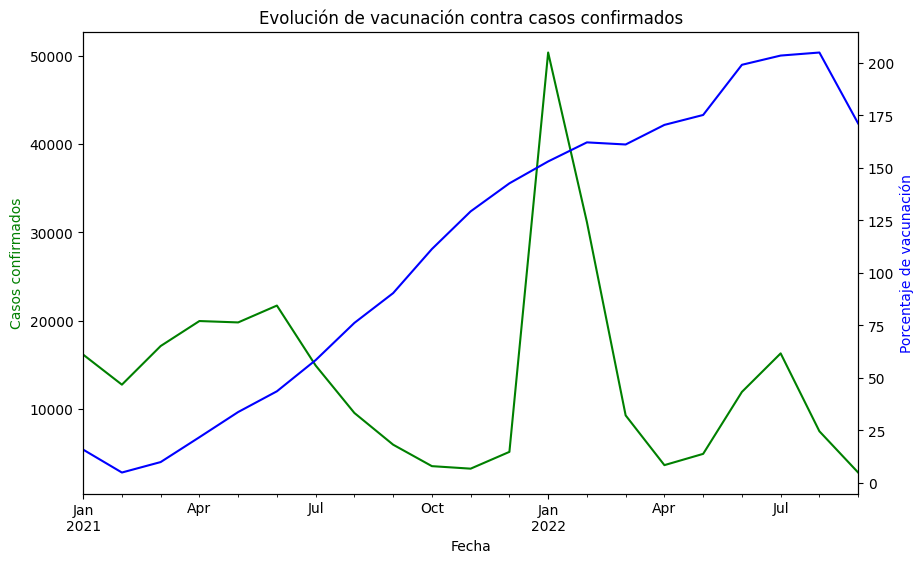

In [ ]:
# Evolucion de vacunacion contra casos confirmados

plt.figure(figsize=(10, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Porcentaje de vacunacion
Data_latinoamerica_nuevo['vaccination_percentage'] = Data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / Data_latinoamerica_nuevo['population'] * 100
Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='g', label='Casos confirmados')
Data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['vaccination_percentage'].plot(ax=ax2, color='b', label='Porcentaje de vacunación')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos confirmados', color='g')
ax2.set_ylabel('Porcentaje de vacunación', color='b')
plt.title('Evolución de vacunación contra casos confirmados')

plt.show()


/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_37737/1783223982.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', ci=None)


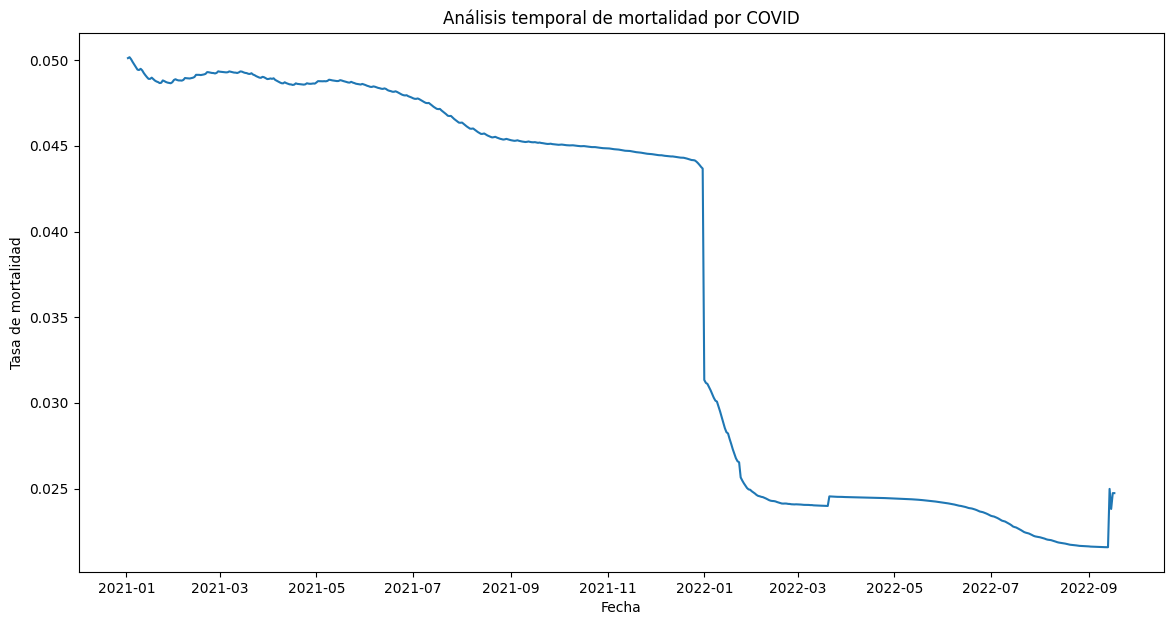

In [ ]:
# Analsis temporal de mortalidad por COVID
Data_latinoamerica_nuevo['mortality_rate'] = Data_latinoamerica_nuevo['cumulative_deceased'] / Data_latinoamerica_nuevo['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=Data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.title('Análisis temporal de mortalidad por COVID')
plt.show()

In [ ]:
# CSV Final listo para power bi
Data_latinoamerica_nuevo.to_csv('data_latinoamerica_final.csv', index=False)